# Zaliczenie przedmiotu "Programowanie w języku Python"
## Studia podyplomowe: "Metody Statystycznej Analizy Danych - edycja IX"
Prowadzący: dr Artur Machno\
Student: Jędrzej Szelc\
Data: 2024.05.30

***
### Spis treści:
1. [Przykład EDA w Pythonie](#1)
	1. [Import danych](#11)
	2. [Sprawdzanie typów danych w ramce](#12)
	3. [Usuwanie nieistotnych kolumn](#13)
	4. [Zmiana nazw kolumn](#14)
	5. [Usuwanie zduplikowanych wierszy](#15)
	6. [Usuwanie brakujących lub pustych wartości](#16)
2. [Budowa modelu uczenia maszynowego w Pythonie](#2)
	1. [Import danych "Boston Housing"](#21)
	2. [Eksploracja danych - statyski opisowe](#22)
	3. [Eksploracja danych - wizualizacja rozkładu cech](#23)
	4. [Eksploracja danych - macierz korelacji](#24)
	5. [Wizualizacja związku pomiędzy zmienną docelową, a pozostałymi](#25)
	6. [Wykres skrzypcowy dla zmiennych "CHAS" vs. "MEDV"](#26)
	7. [Podział danych na zbiory uczące i testowe](#27)
	8. [Budowa modelu regresji liniowej](#28)
	9. [Obliczanie przedziałów ufności współczynników](#29)
	10. [Selekcja zmiennych metodą Krokowej Eliminacji Wstecznej (KEW)](#210)
	11. [Porównanie jakości modeli względem zbioru testowego](#211)
	12. [Tworzę modele "Ridge" oraz "Lasso"](#212)
	13. [Skalowanie cech przed zastosowaniem regresji "Ridge" oraz "Lasso"](#213)
	14. [Wprowadzenie do regresji typu "Ridge"](#214)
	15. [Wprowadzenie do regresji typu "Lasso"](#215)
	16. [Porównanie modeli "Ridge", "Lasso" oraz regresji liniowej](#216)
	17. [Wstępna konfiguracja oraz inicjalizacja XGBoost](#217)
	18. [Dobór hiperparametrów dla modelu XGBoost](#218)
	19. [Wyznaczanie ważności cech ("Feature Importance") w XGBoost](#219)
	20. [Interpretacja modelu XGBoost](#220)
3. [Overfitting w modelach uczenia maszynowego](#3)
	1. [Generowanie danych z prostego modelu liniowego](#31)
	2. [Dopasowanie modeli wielomianowych x-stopni do danych liniowych](#32)
	3. [Generowanie danych z rozkładu normalnego](#33)
	4. [Dopasowanie modelu liniowego przy użyciu "statsmodels"](#34)
	5. [Analiza istotności zmiennych modelu](#35)
	6. [Ocena modelu na zbiorach treningowym i testowym](#36)
4. [Projekt zaliczeniowy UPEL](#4)
   1. [Import danych](#41)
   2. [Sprawdzanie typów danych w ramce](#42)
   3. [Zmiana nazw kolumn](#43)
   4. [Usuwanie typu wina "red"](#44)
   5. [Usuwanie zduplikowanych wierszy](#45)
   6.  [Usuwanie brakujących lub pustych wartości](#46)
   7.  [Eksploracja danych - statyski opisowe](#47)
   8.  [Eksploracja danych - wizualizacja rozkładu cech](#48)
   9.  [Eksploracja danych - macierz korelacji](#49)
   10. [Eksploracja danych - wizualizacja związku pomiędzy zmienną objaśnianą, a objaśniającymi](#410)
   11. [Selekcja zmiennych objaśniających do modelu liniowego oraz podział danych na zbiory uczące i testowe](#411)
   12. [Budowa modelu regresji liniowej](#412)
   13. [Obliczanie przedziałów ufności współczynników](#413)
   14. [Selekcja zmiennych metodą Krokowej Eliminacji Wstecznej (KEW)](#414)
   15. [Porównanie jakości modeli względem zbioru testowego](#415)
   16. [Podsumowanie i dyskusja wyników](#416)

***
## 0. Konfiguracja całego arkusza
Niniejsza konfiguracja stanowi ogólną konfigurację dla dalszych ćwiczeń (sekcje [1.](#1), [2.](#2) oraz [3.](#3)) oraz projektu UPEL (patrz sekcja [4.](#4)).

In [1]:
### Import modułów
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import shap
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

### Konfiguracja ścieżek
string_aktualna_sciezka = os.getcwd()
string_aktualna_sciezka_katalogu_danych = string_aktualna_sciezka + "\\Input-Data\\"

c:\Users\jszelc\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


***
## 1. Przykład EDA w Pythonie
<a id="1"></a>

***
### 1.1. Import danych
<a id="11"></a>

In [2]:
string_aktualny_plik_z_danymi = "data.csv"
dataframe_cars = pd.read_csv(string_aktualna_sciezka_katalogu_danych+string_aktualny_plik_z_danymi)
dataframe_cars.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


***
### 1.2. Sprawdzanie typów danych w ramce
<a id="12"></a>

In [3]:
print(dataframe_cars.dtypes)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


***
### 1.3. Usuwanie nieistotnych kolumn
<a id="13"></a>

In [4]:
### Usuwanie nieistotnych kolumn
dataframe_cars = dataframe_cars.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

### Wizualizacja po usunięciu nieistotnych kolumn
print(dataframe_cars.head())

  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500  


***
### 1.4. Zmiana nazw kolumn
<a id="14"></a>

In [5]:
### Zmiana nazw kolumn
dataframe_cars = dataframe_cars.rename(columns={'Engine HP': 'HP', 
                        'Engine Cylinders': 'Cylinders', 
                        'Transmission Type': 'Transmission', 
                        'Driven_Wheels': 'Drive Mode', 
                        'highway MPG': 'MPG-H', 
                        'city mpg': 'MPG-C', 
                        'MSRP': 'Price'})

### Wyświetlenie ramki danych po zmianie nazw kolumn
print(dataframe_cars.head())

  Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500  


***
### 1.5. Usuwanie zduplikowanych wierszy
<a id="15"></a>

In [6]:
### Wyświetlenie liczby wierszy przed usunięciem duplikatów
print("Liczba wierszy przed usunięciem duplikatów:", len(dataframe_cars))

### Usunięcie zduplikowanych wierszy
dataframe_cars = dataframe_cars.drop_duplicates()

### Wyświetlenie liczby wierszy po usunięciu duplikatów
print("Liczba wierszy po usunięciu duplikatów:", len(dataframe_cars))

### Wyświetlenie liczby wartości niepustych w każdej kolumnie
print(dataframe_cars.count())

Liczba wierszy przed usunięciem duplikatów: 11914
Liczba wierszy po usunięciu duplikatów: 10925
Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64


***
### 1.6. Usuwanie brakujących lub pustych wartości
<a id="16"></a>

In [7]:
### Wyświetlenie liczby brakujących wartości dla każdej kolumny
print(dataframe_cars.isnull().sum())

### Usuwanie brakujących wartości
dataframe_cars = dataframe_cars.dropna()    

### Wyświetlanie liczby niepustych wartości
print(dataframe_cars.count())

### Ramka danych po raz kolejny - tym razem po usunięciu pustych wartości
print(dataframe_cars.isnull().sum())  

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64
Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


***
## 2. Budowa modelu uczenia maszynowego w Pythonie
<a id="2"></a>

***
### 2.1. Import danych "Boston Housing"
<a id="21"></a>

In [8]:
### Import danych ze strony www
string_adres_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
dataframe_boston_housing = pd.read_csv(string_adres_url, header=None, delim_whitespace=True)

# dodajemy nazwy kolumn
lista_nazwy_kolumn = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe_boston_housing.columns = lista_nazwy_kolumn

display(dataframe_boston_housing.head())
display(dataframe_boston_housing.tail())

C:\Users\jszelc\AppData\Local\Temp\ipykernel_4516\1253186707.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe_boston_housing = pd.read_csv(string_adres_url, header=None, delim_whitespace=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


***
### 2.2. Eksploracja danych - statyski opisowe
<a id="22"></a>

In [9]:
dataframe_boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


***
### 2.3. Eksploracja danych - wizualizacja rozkładu cech
<a id="23"></a>

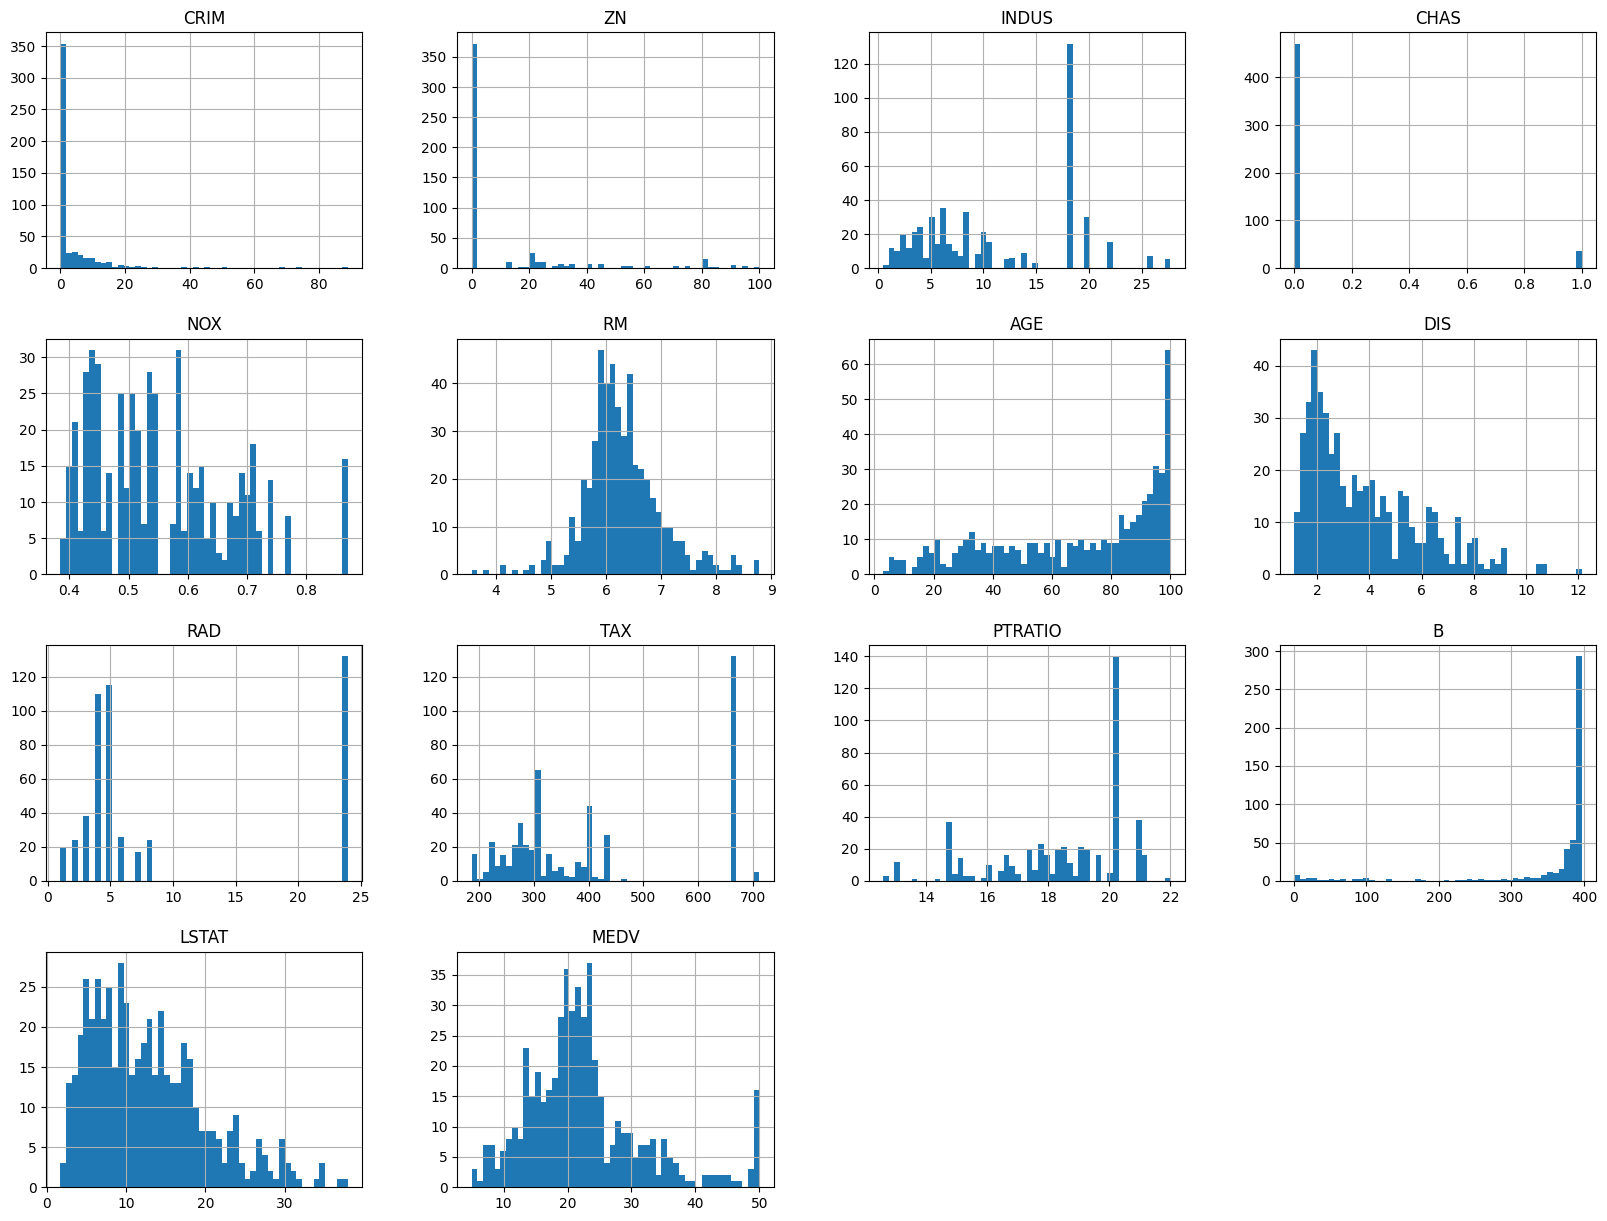

In [10]:
### Histogramy każdej zmiennej
integer_liczba_bins_histogramow = 50
integer_rozmiar_x_wykresow = 20
integer_rozmiar_y_wykresow = 15

dataframe_boston_housing.hist(bins=integer_liczba_bins_histogramow, 
                              figsize=(integer_rozmiar_x_wykresow,integer_rozmiar_y_wykresow))

plt.show()

***
### 2.4. Eksploracja danych - macierz korelacji
<a id="24"></a>

In [11]:
dataframe_boston_housing.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


***
### 2.5. Wizualizacja związku pomiędzy zmienną docelową, a pozostałymi
<a id="25"></a>

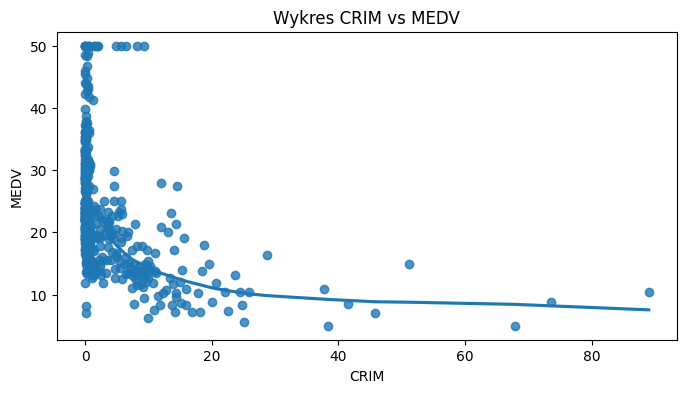

c:\Users\jszelc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


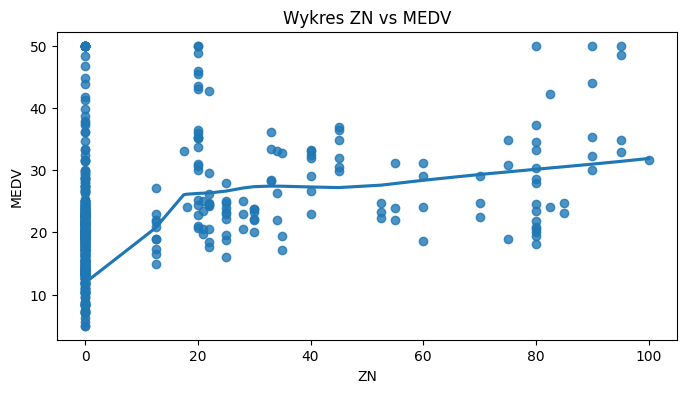

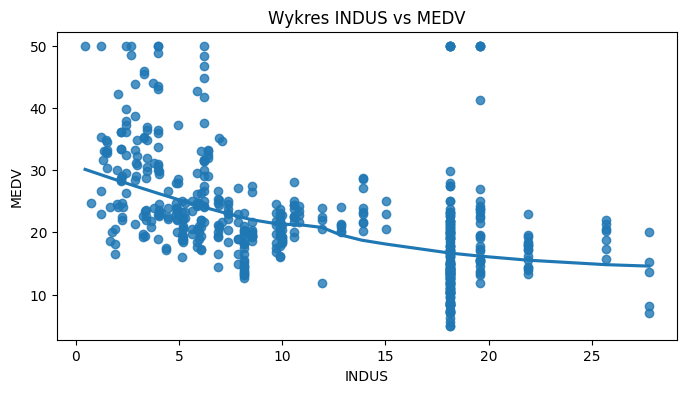

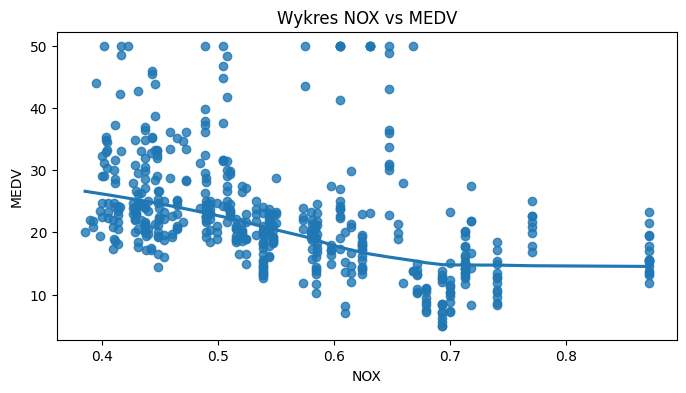

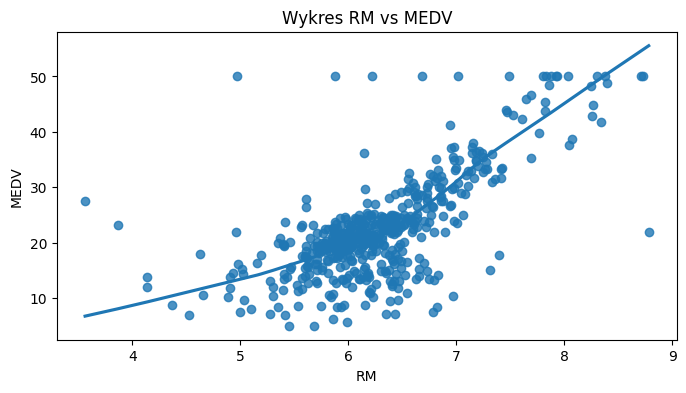

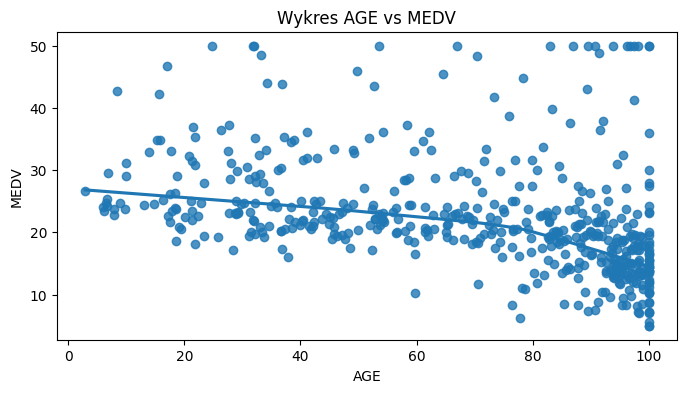

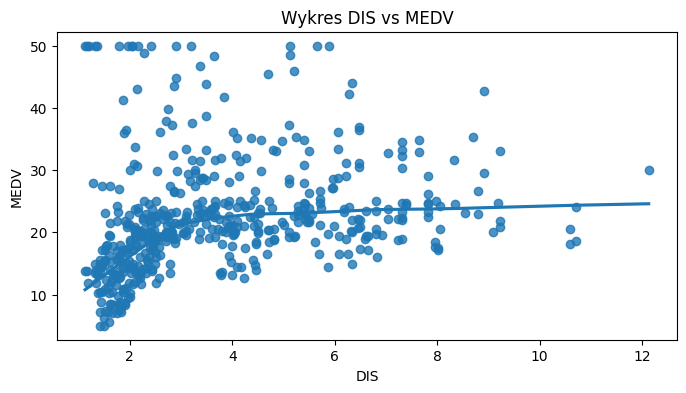

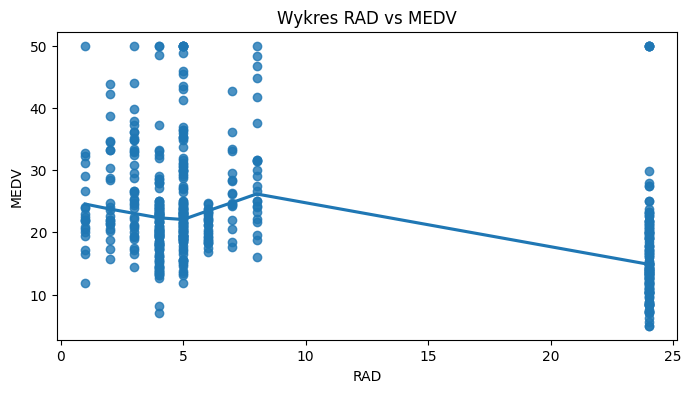

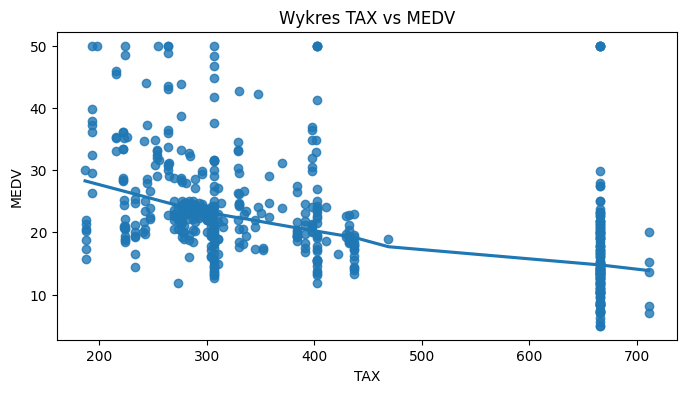

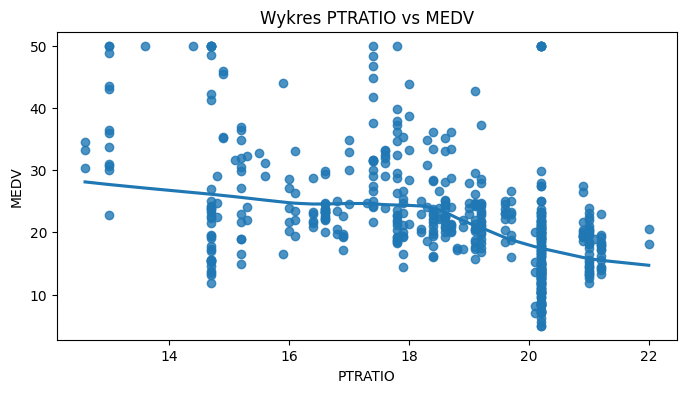

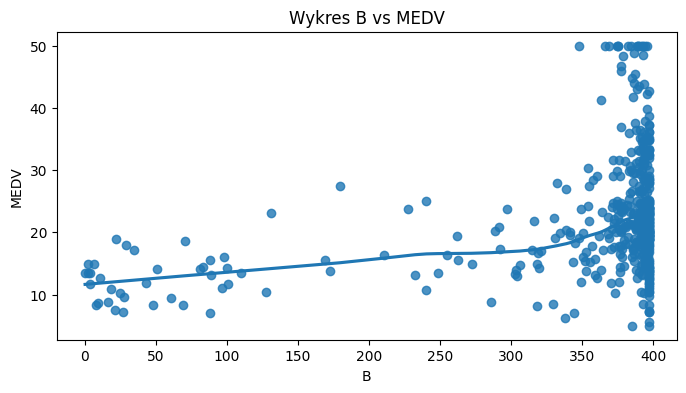

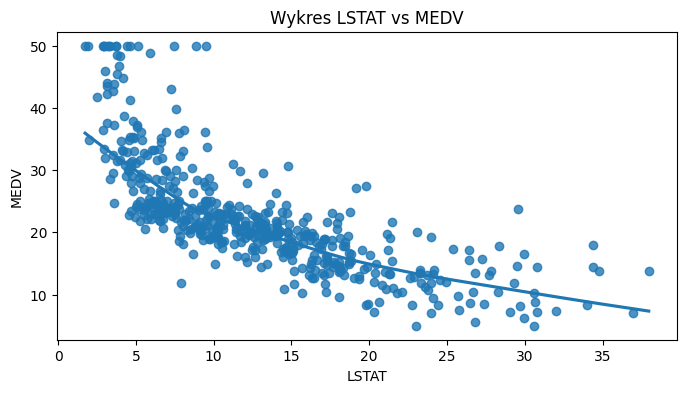

In [12]:
### Definicja zmiennych liczbowych
lista_nazwy_zmiennych_liczbowych = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

### Tworzenie wykresów
integer_rozmiar_x_wykresow = 8
integer_rozmiar_y_wykresow = 4

for counter_aktualna_nazwa in lista_nazwy_zmiennych_liczbowych: 
    plt.figure(figsize=(integer_rozmiar_x_wykresow,integer_rozmiar_y_wykresow))
    sns.regplot(data=dataframe_boston_housing, x=counter_aktualna_nazwa, y='MEDV', lowess=True)
    plt.title(f'Wykres {counter_aktualna_nazwa} vs MEDV')
    plt.xlabel(counter_aktualna_nazwa)
    plt.ylabel('MEDV')
    plt.show()
    

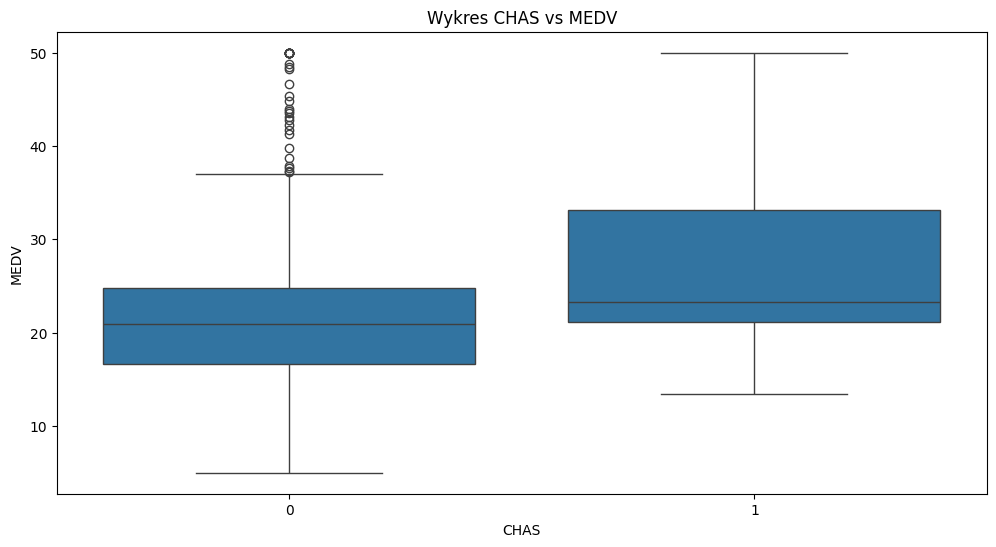

In [13]:
### Tworzenie wykresów
integer_rozmiar_x_wykresow = 12
integer_rozmiar_y_wykresow = 6

plt.figure(figsize=(integer_rozmiar_x_wykresow,
                    integer_rozmiar_y_wykresow))
sns.boxplot(data=dataframe_boston_housing, x='CHAS', y='MEDV')
plt.title('Wykres CHAS vs MEDV')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()
    

***
### 2.6. Wykres skrzypcowy dla zmiennych "CHAS" vs. "MEDV"
<a id="26"></a>

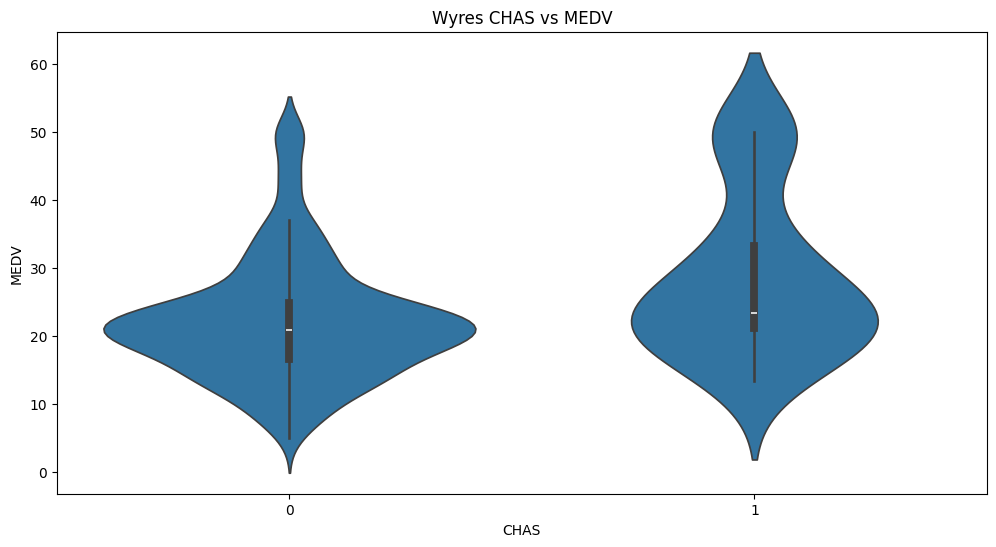

In [14]:
### Tworzenie wykresów
integer_rozmiar_x_wykresow = 12
integer_rozmiar_y_wykresow = 6

plt.figure(figsize=(integer_rozmiar_x_wykresow,
                    integer_rozmiar_y_wykresow))
sns.violinplot(data=dataframe_boston_housing, x='CHAS', y='MEDV')
plt.title('Wyres CHAS vs MEDV')
plt.xlabel('CHAS')
plt.ylabel('MEDV')
plt.show()
    

***
### 2.7. Podział danych na zbiory uczące i testowe
<a id="27"></a>

In [15]:
X = dataframe_boston_housing.drop('MEDV', axis=1)
y = dataframe_boston_housing['MEDV']

#### Podział danych na zbiór uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("Liczba wierszy w zbiorze treningowym:", len(X_train))
print("Liczba wierszy w zbiorze testowym:", len(X_test))

Liczba wierszy w zbiorze treningowym: 404
Liczba wierszy w zbiorze testowym: 102


***
### 2.8. Budowa modelu regresji liniowej
<a id="28"></a>

In [16]:
### Tworzenie modelu regresji liniowej
obiekt_modelu_regresji_liniowej = LinearRegression()

### Trenowanie modelu regresji liniowej
obiekt_modelu_regresji_liniowej.fit(X_train, y_train)

for name, coef in zip(dataframe_boston_housing.columns[:-1], obiekt_modelu_regresji_liniowej.coef_):
    print(f'{name}: {coef:.4f}')

CRIM: -0.1082
ZN: 0.0389
INDUS: -0.0152
CHAS: 3.1590
NOX: -16.5854
RM: 3.6329
AGE: 0.0094
DIS: -1.3862
RAD: 0.3241
TAX: -0.0116
PTRATIO: -1.0364
B: 0.0116
LSTAT: -0.5584


***
### 2.9. Obliczanie przedziałów ufności współczynników
<a id="29"></a>

In [17]:
### Dodaję stałą
X_train_with_const = sm.add_constant(X_train)

### Trenuję model
ols_model_0 = sm.OLS(y_train, X_train_with_const).fit()

### Podsumowanie
ols_model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     80.53
Date:                Thu, 30 May 2024   Prob (F-statistic):          9.61e-102
Time:                        04:11:55   Log-Likelihood:                -1206.2
No. Observations:                 404   AIC:                             2440.
Df Residuals:                     390   BIC:                             2496.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1998      5.875      6.332      0.000      25.649      48.750
CRIM          -0.1082      0.036     -2.986      0.003      -0.179      -0.037
ZN             0.0389      0.016      2.376      0.018       0.007       0.071
INDUS         -0.0152      0.068     -0.224      0.823      -0.148       0.118
CHAS           3.1590      0.981      3.219      0.001       1.230       5.088
NOX          -16.5854      4.392     -3.777      0.000     -25.220      -7.951
RM             3.6329      0.466      7.798      0.000       2.717       4.549
AGE            0.0094      0.015      0.625      0.532      -0.020       0.039
DIS           -1.3862      0.225     -6.154      0.000      -1.829      -0.943
RAD            0.3241      0.073      4.431      0.000       0.180       0.468
TAX           -0.0116      0.004     -2.862      0.004      -0.020      -0.004
PTRATIO       -1.0364      0.155     -6.691      0.000      -1.341      -0.732
B              0.0116      0.003      3.810      0.000       0.006       0.018
LSTAT         -0.5584      0.058     -9.581      0.000      -0.673      -0.444
==============================================================================
Omnibus:                      134.233   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.174
Skew:                           1.418   Prob(JB):                    9.24e-120
Kurtosis:                       7.952   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
### 2.10. Selekcja zmiennych metodą Krokowej Eliminacji Wstecznej (KEW)
<a id="210"></a>

In [18]:
### Ustalenie poziomu istotności
float_alpha = 0.05

selected_features = X_train_with_const.columns.tolist()
ols_model = sm.OLS(y_train, X_train_with_const).fit()

while max(ols_model.pvalues) > float_alpha: 
    col_to_remove = ols_model.pvalues.idxmax()
    selected_features.remove(col_to_remove)
    ols_model = sm.OLS(y_train, X_train_with_const[selected_features]).fit()
    
print("Wybrane zmienne:")
print(selected_features)

print("\nParametry modelu:")
display(ols_model.summary())

Wybrane zmienne:
['const', 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

Parametry modelu:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     95.51
Date:                Thu, 30 May 2024   Prob (F-statistic):          1.25e-103
Time:                        04:11:55   Log-Likelihood:                -1206.4
No. Observations:                 404   AIC:                             2437.
Df Residuals:                     392   BIC:                             2485.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.9993      5.840      6.336      0.000      25.518      48.481
CRIM          -0.1082      0.036     -2.996      0.003      -0.179      -0.037
ZN             0.0381      0.016      2.358      0.019       0.006       0.070
CHAS           3.1677      0.972      3.260      0.001       1.258       5.078
NOX          -16.1423      4.086     -3.950      0.000     -24.176      -8.108
RM             3.6974      0.454      8.135      0.000       2.804       4.591
DIS           -1.4137      0.210     -6.730      0.000      -1.827      -1.001
RAD            0.3254      0.070      4.632      0.000       0.187       0.464
TAX           -0.0119      0.004     -3.220      0.001      -0.019      -0.005
PTRATIO       -1.0344      0.153     -6.764      0.000      -1.335      -0.734
B              0.0118      0.003      3.884      0.000       0.006       0.018
LSTAT         -0.5471      0.054    -10.046      0.000      -0.654      -0.440
==============================================================================
Omnibus:                      137.452   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              577.442
Skew:                           1.445   Prob(JB):                    4.08e-126
Kurtosis:                       8.095   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
### 2.11. Porównanie jakości modeli względem zbioru testowego
<a id="211"></a>

In [19]:
### Jakość modelu ze wszystkimi zmiennymi
X_test_with_const = sm.add_constant(X_test)
y_pred_0 = ols_model_0.predict(X_test_with_const)
mse_0 = mean_squared_error(y_test, y_pred_0)
r2_0 = r2_score(y_test, y_pred_0)

### jakość modelu po selekcji
X_test_selected = X_test_with_const[ols_model.model.exog_names]
y_pred = ols_model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Porównanie wyników na zbiorze testowym:")
print(f'Model z wszystkimi zmiennymi: MSE = {mse_0:.4f}, R^2 = {r2_0:.4f}')
print(f'Model po seleckcji: MSE = {mse:.4f}, R^2 = {r2:.4f}')


Porównanie wyników na zbiorze testowym:
Model z wszystkimi zmiennymi: MSE = 18.4954, R^2 = 0.7789
Model po seleckcji: MSE = 18.2535, R^2 = 0.7818


***
## Wprowadzenie do regularyzacji - "Ridge Regression" oraz "Lasso Regression"

***
### 2.12. Tworzę modele "Ridge" oraz "Lasso"
<a id="212"></a>

In [20]:
lasso_model = Ridge(alpha=1)
lasso_model = Lasso(alpha=1)


***
### 2.13. Skalowanie cech przed zastosowaniem regresji "Ridge" oraz "Lasso"
<a id="213"></a>

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


***
### 2.14. Wprowadzenie do regresji typu "Ridge"
<a id="214"></a>

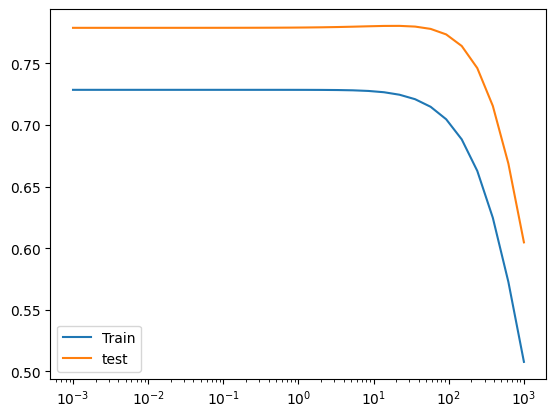

In [22]:
ridge_alphas = np.logspace(-3,3,30)

# inicjowanie list R^2
ridge_train_scores = []
ridge_test_scores = []

for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)

    train_score = ridge_model.score(X_train_scaled, y_train)
    test_score = ridge_model.score(X_test_scaled, y_test)

    ridge_train_scores.append(train_score)
    ridge_test_scores.append(test_score)
# wizualizacja
plt.plot(ridge_alphas, ridge_train_scores, label="Train")
plt.plot(ridge_alphas, ridge_test_scores, label="test")
plt.xscale('log')
plt.legend()
plt.show()



In [23]:
### Walidacja krzyżowa (CV)
ridge_alphas = np.logspace(-3,3,30)

### Optymalizacja hiperparametrówna zbiorze testowym
ridge_best_alpha = ridge_alphas[np.argmax(ridge_test_scores)]
ridge_best_model = Ridge(alpha=ridge_best_alpha)
ridge_best_model.fit(X_train_scaled, y_train)

ridge_best_train_score = ridge_best_model.score(X_train_scaled, y_train)
ridge_best_test_score = ridge_best_model.score(X_test_scaled, y_test)

print(f'Optymalna wartość alpha: {ridge_best_alpha:.2f}')
print(f'R^2 na zbiorze treningowym: {ridge_best_train_score:.4f}')
print(f'R^2 na zbiorze testowym: {ridge_best_test_score:.4f}')

### Optymalizacja hiperparametrów na podstawie walidacji krzyżowej (CV)
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

ridge_cv_best_alpha = ridge_cv.alpha_
ridge_cv_train_score = ridge_cv.score(X_train_scaled, y_train)
ridge_cv_test_score = ridge_cv.score(X_test_scaled, y_test)

print(f'\nOptymalna wartość alpha: {ridge_cv_best_alpha:.2f}')
print(f'R^2 na zbiorze treningowym: {ridge_cv_train_score:.4f}')
print(f'R^2 na zbiorze testowym: {ridge_cv_test_score:.4f}')




Optymalna wartość alpha: 22.12
R^2 na zbiorze treningowym: 0.7246
R^2 na zbiorze testowym: 0.7805

Optymalna wartość alpha: 5.30
R^2 na zbiorze treningowym: 0.7282
R^2 na zbiorze testowym: 0.7798


***
### 2.15. Wprowadzenie do regresji typu "Lasso"
<a id="215"></a>

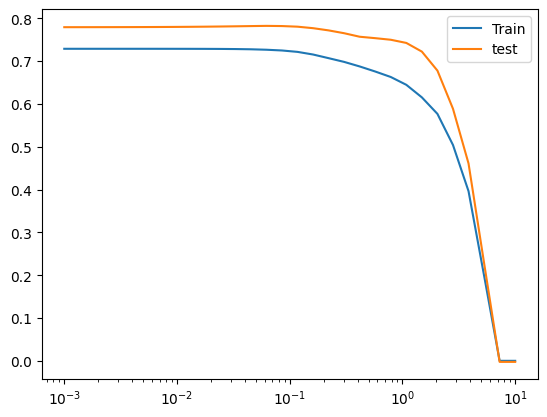

In [24]:
ridge_alphas = np.logspace(-3,3,30)

lasso_alphas = np.logspace(-3,1,30)

### Inicjalizacja list wynikowych R^2
lasso_train_scores = []
lasso_test_scores = []

for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)

    train_score = lasso_model.score(X_train_scaled, y_train)
    test_score = lasso_model.score(X_test_scaled, y_test)

    lasso_train_scores.append(train_score)
    lasso_test_scores.append(test_score)
# wizualizacja
plt.plot(lasso_alphas, lasso_train_scores, label="Train")
plt.plot(lasso_alphas, lasso_test_scores, label="test")
plt.xscale('log')
plt.legend()
plt.show()




In [25]:
### Optymalizacja hiperparametrów na zbiorze testowym
lasso_best_alpha = lasso_alphas[np.argmax(lasso_test_scores)]
lasso_best_model = Lasso(alpha=lasso_best_alpha)
lasso_best_model.fit(X_train_scaled, y_train)

lasso_best_train_score = lasso_best_model.score(X_train_scaled, y_train)
lasso_best_test_score = lasso_best_model.score(X_test_scaled, y_test)

print(f'Optymalna wartość alpha: {lasso_best_alpha:.2f}')
print(f'R^2 na zbiorze treningowym: {lasso_best_train_score:.4f}')
print(f'R^2 na zbiorze testowym: {lasso_best_test_score:.4f}')

### Optymalizacja hiperparametrów na zbioże CV
lasso_cv = LassoCV(alphas=lasso_alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

lasso_cv_best_alpha = lasso_cv.alpha_
lasso_cv_train_score = lasso_cv.score(X_train_scaled, y_train)
lasso_cv_test_score = lasso_cv.score(X_test_scaled, y_test)

print(f'\nOptymalna wartość alpha: {lasso_cv_best_alpha:.2f}')
print(f'R^2 na zbiorze treningowym: {lasso_cv_train_score:.4f}')
print(f'R^2 na zbiorze testowym: {lasso_cv_test_score:.4f}')




Optymalna wartość alpha: 0.06
R^2 na zbiorze treningowym: 0.7264
R^2 na zbiorze testowym: 0.7821

Optymalna wartość alpha: 0.00
R^2 na zbiorze treningowym: 0.7286
R^2 na zbiorze testowym: 0.7790


***
### 2.16. Porównanie modeli "Ridge", "Lasso" oraz regresji liniowej
<a id="216"></a>

In [26]:

### Porównanie trzech regresji
print("Porównanie trzech regresji")
ridge_pred = ridge_cv.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_pred = lasso_cv.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Regresja liniowa: MSE = {mse_0:.2f}, R^2 = {r2_0:.4f}')
print(f'Regresja Ridge: MSE = {ridge_mse:.2f}, R^2 = {ridge_r2:.4f}')
print(f'Regresja Lasso: MSE = {lasso_mse:.2f}, R^2 = {lasso_r2:.4f}')

### Model OLS dla zmiennych standaryzowanych
print("Model OLS")
ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    'Feature': dataframe_boston_housing.columns[:-1],
    'OLS': ols_model.coef_,
    'Ridge': ridge_cv.coef_,
    'Lasso': lasso_cv.coef_})

display(coef_df)



Porównanie trzech regresji
Regresja liniowa: MSE = 18.50, R^2 = 0.7789
Regresja Ridge: MSE = 18.42, R^2 = 0.7798
Regresja Lasso: MSE = 18.49, R^2 = 0.7790
Model OLS


,Feature,OLS,Ridge,Lasso
0,CRIM,-0.934512,-0.892870,-0.931834
1,ZN,0.854877,0.780809,0.851093
2,INDUS,-0.104468,-0.207207,-0.105466
3,CHAS,0.815418,0.837027,0.815406
4,NOX,-1.907319,-1.753230,-1.901382
5,RM,2.546500,2.594695,2.548277
6,AGE,0.259415,0.214842,0.255447
7,DIS,-2.926540,-2.770089,-2.920972
8,RAD,2.805055,2.426393,2.790948
9,TAX,-1.956998,-1.629963,-1.945677


***
## Wprowadzenie do XGBoost

***
### 2.17. Wstępna konfiguracja oraz inicjalizacja XGBoost
<a id="217"></a>

In [27]:
### Inicjalizacja modelu
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=41)

### Dopasowanie modelu
xgb_model.fit(X_train, y_train)

### Prognoza
y_pred = xgb_model.predict(X_test)

### Miary dopasowania
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'XGB: MSE = {mse:.4f}, R^2 = {r2:.4f}')




XGB: MSE = 7.9333, R^2 = 0.9052


***
### 2.18. Dobór hiperparametrów dla modelu XGBoost
<a id="218"></a>

In [28]:
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1]
}

grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=1)

grid_search.fit(X_train, y_train)

print("Wybrany zestaw hiperparametrów")
print(grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

### Miary dopasowania
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'XGB: MSE = {mse:.4f}, R^2 = {r2:.4f}')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Wybrany zestaw hiperparametrów
{'colsample_bytree': 1, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 1}
XGB: MSE = 6.4006, R^2 = 0.9235


***
### 2.19. Wyznaczanie ważności cech ("Feature Importance") w XGBoost
<a id="219"></a>

Wykres


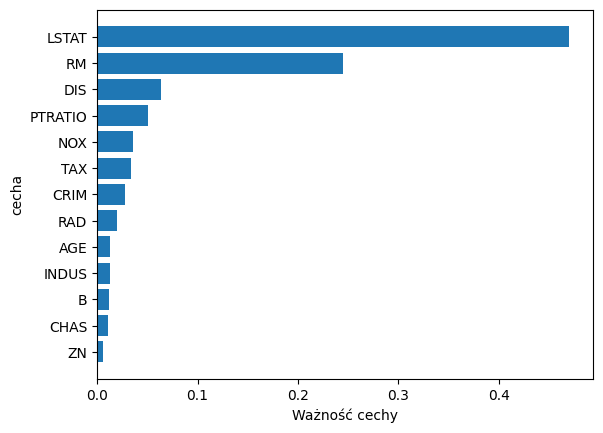

Kolumny


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [29]:
feature_importances = best_xgb_model.feature_importances_

importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

importance_df = importance_df.sort_values(by='importance')

### Wykres "Feature Importance"
print("Wykres")
plt.figure()
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Ważność cechy')
plt.ylabel('cecha')
plt.show()

### Kolumny
print("Kolumny")
X_train.columns

***
### 2.20. Interpretacja modelu XGBoost
<a id="220"></a>

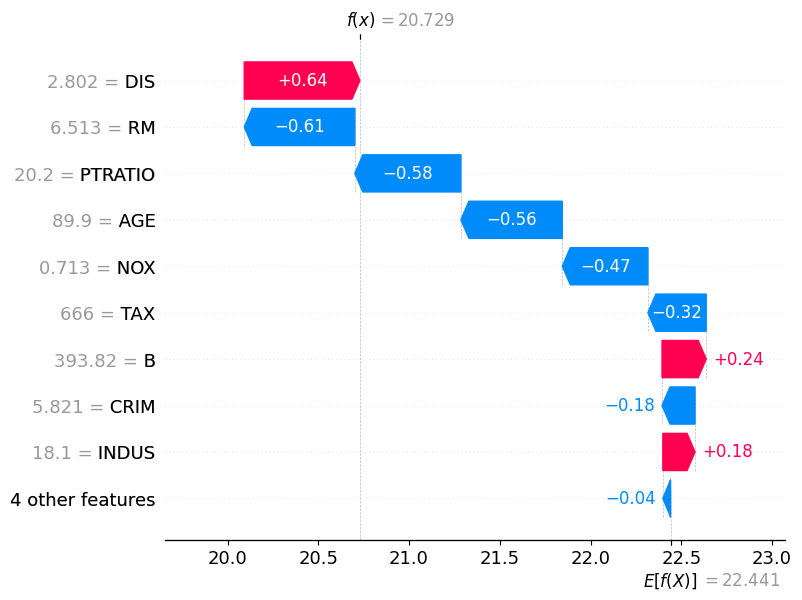

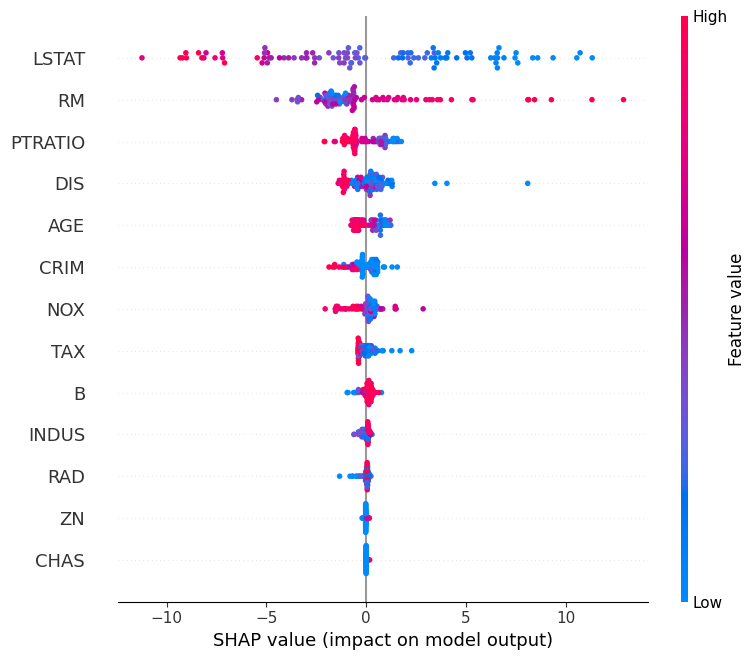

In [30]:
np.int = int
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer(X_test)
sample_indices = [0, 100, 200]
shap.plots.waterfall(shap_values[0], max_display=10)
shap.summary_plot(shap_values, X_test)

***
## 3. Overfitting w modelach uczenia maszynowego
<a id="3"></a>

***
### 3.1. Generowanie danych z prostego modelu liniowego
<a id="31"></a>

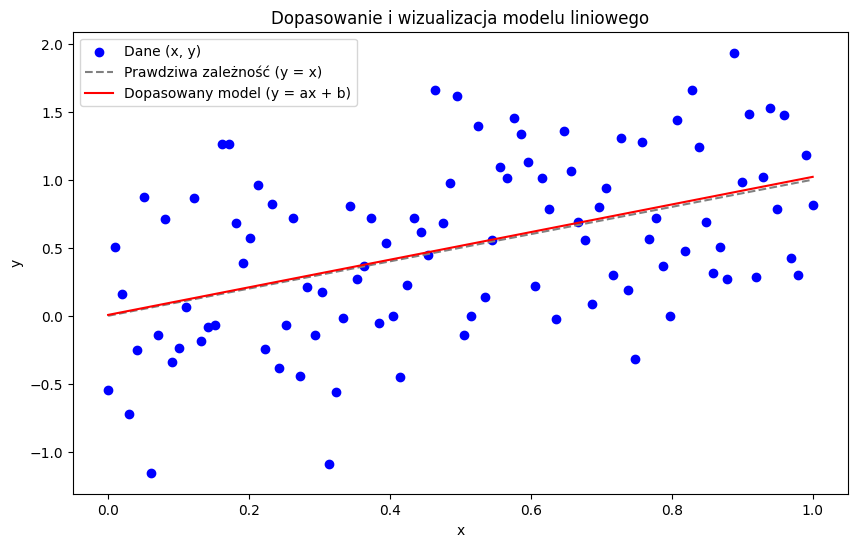

In [31]:
### Ustawiamy ziarno losowości dla powtarzalności wyników
np.random.seed(123)

### Generujemy 100 punktów danych
x = np.linspace(0, 1, 100).reshape(-1, 1) 
error = np.random.normal(0, 0.5, 100).reshape(-1, 1)
y = x + error

### Dopasowanie modelu liniowego
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

### Wizualizacja danych
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Dane (x, y)')
plt.plot(x, x, color='gray', linestyle='--', label='Prawdziwa zależność (y = x)')
plt.plot(x, y_pred, color='red', label='Dopasowany model (y = ax + b)')
plt.title('Dopasowanie i wizualizacja modelu liniowego')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

***
### 3.2. Dopasowanie modeli wielomianowych x-stopni do danych liniowych
<a id="32"></a>

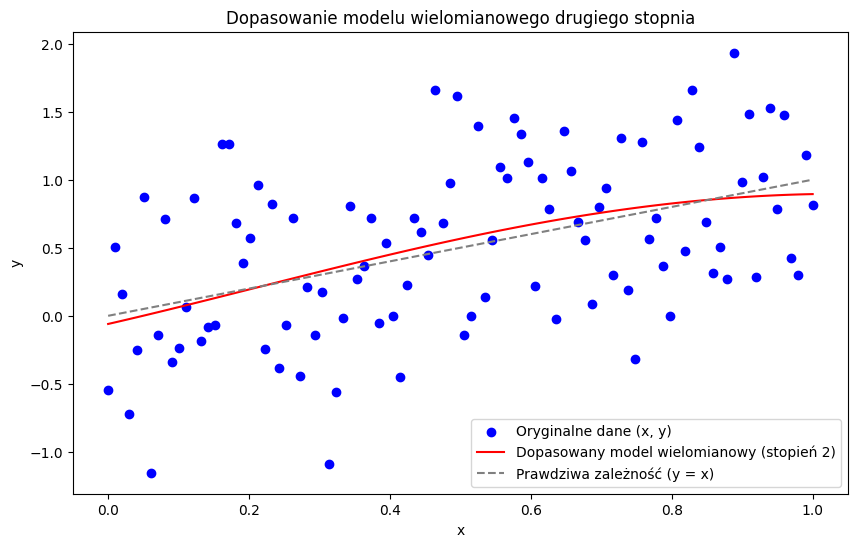

In [32]:
### Przygotowanie danych (przykład używa wcześniej zdefiniowanych zmiennych x i y)
data = pd.DataFrame({
    'x': x.ravel(),  # upewniamy się, że x jest wektorem jednowymiarowym
    'x_squared': x.ravel()**2,
    'y': y.ravel()
})

### Tworzymy funkcje wielomianowe do stopnia 3 bez uwzględniania biasu
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = polynomial_features.fit_transform(data[['x', 'x_squared']])

# Dopasowanie modelu wielomianowego
model = LinearRegression().fit(x_poly, data['y'])
y_pred = model.predict(x_poly)

### Wizualizacja danych i dopasowanego modelu
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Oryginalne dane (x, y)')
plt.plot(data['x'], y_pred, color='red', label='Dopasowany model wielomianowy (stopień 2)')
plt.plot(x, x, color='gray', linestyle='--', label='Prawdziwa zależność (y = x)')
plt.title('Dopasowanie modelu wielomianowego drugiego stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


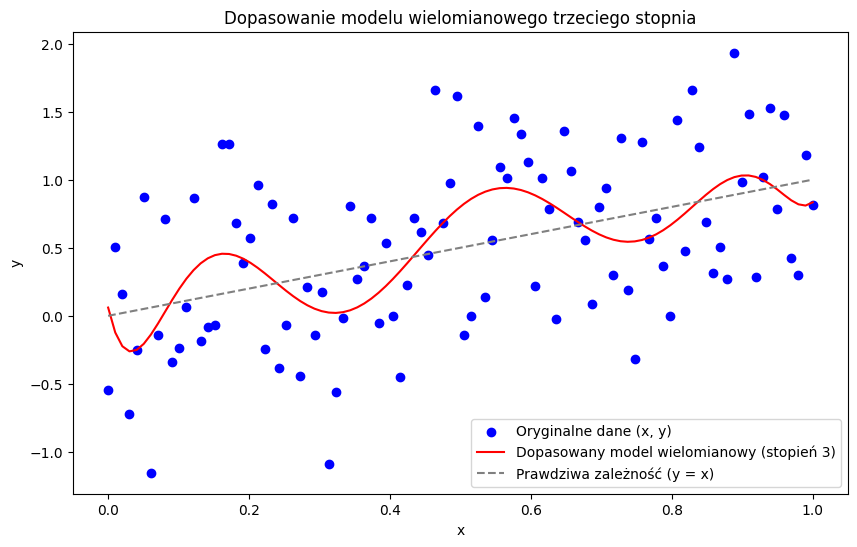

In [33]:
### Przygotowanie danych (przykład używa wcześniej zdefiniowanych zmiennych x i y)
data = pd.DataFrame({
    'x': x.ravel(),  # upewniamy się, że x jest wektorem jednowymiarowym
    'x_squared': x.ravel()**2,
    'x_cubed': x.ravel()**3,  
    'y': y.ravel()
})

### Tworzymy funkcje wielomianowe do stopnia 3 bez uwzględniania biasu
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
x_poly = polynomial_features.fit_transform(data[['x', 'x_squared', 'x_cubed']])

### Dopasowanie modelu wielomianowego
model = LinearRegression().fit(x_poly, data['y'])
y_pred = model.predict(x_poly)

### Wizualizacja danych i dopasowanego modelu
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Oryginalne dane (x, y)')
plt.plot(data['x'], y_pred, color='red', label='Dopasowany model wielomianowy (stopień 3)')
plt.plot(x, x, color='gray', linestyle='--', label='Prawdziwa zależność (y = x)')
plt.title('Dopasowanie modelu wielomianowego trzeciego stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


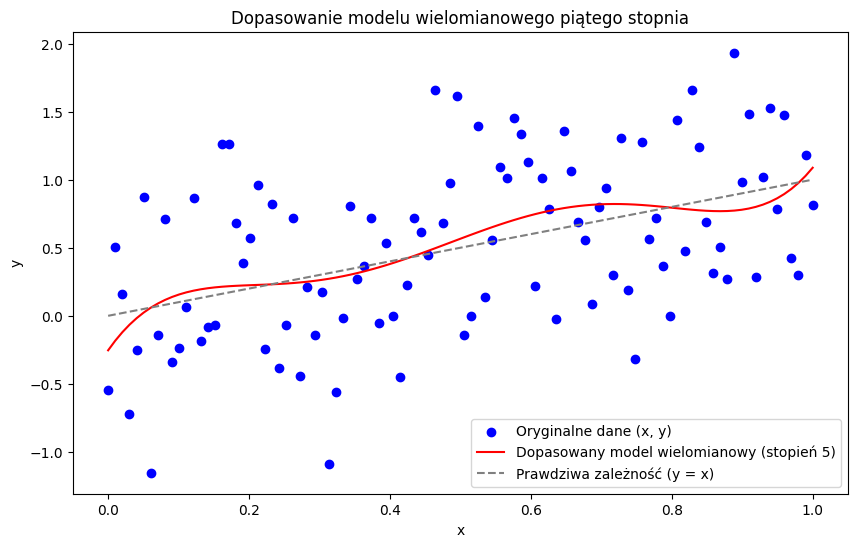

In [34]:
### Przygotowanie danych (przykład używa wcześniej zdefiniowanych zmiennych x i y)
data = pd.DataFrame({
    'x': x.ravel(),  # upewniamy się, że x jest wektorem jednowymiarowym
    'y': y.ravel()
})

### Tworzymy funkcje wielomianowe do stopnia 5 bez uwzględniania biasu
polynomial_features = PolynomialFeatures(degree=5, include_bias=False)
x_poly = polynomial_features.fit_transform(data[['x']])  

### Dopasowanie modelu wielomianowego
model = LinearRegression().fit(x_poly, data['y'])
y_pred = model.predict(x_poly)

### Sortowanie danych do wizualizacji
sorted_indices = np.argsort(data['x'])
x_sorted = data['x'][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

### Wizualizacja danych i dopasowanego modelu
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Oryginalne dane (x, y)')
plt.plot(x_sorted, y_pred_sorted, color='red', label='Dopasowany model wielomianowy (stopień 5)')
plt.plot(x, x, color='gray', linestyle='--', label='Prawdziwa zależność (y = x)')
plt.title('Dopasowanie modelu wielomianowego piątego stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


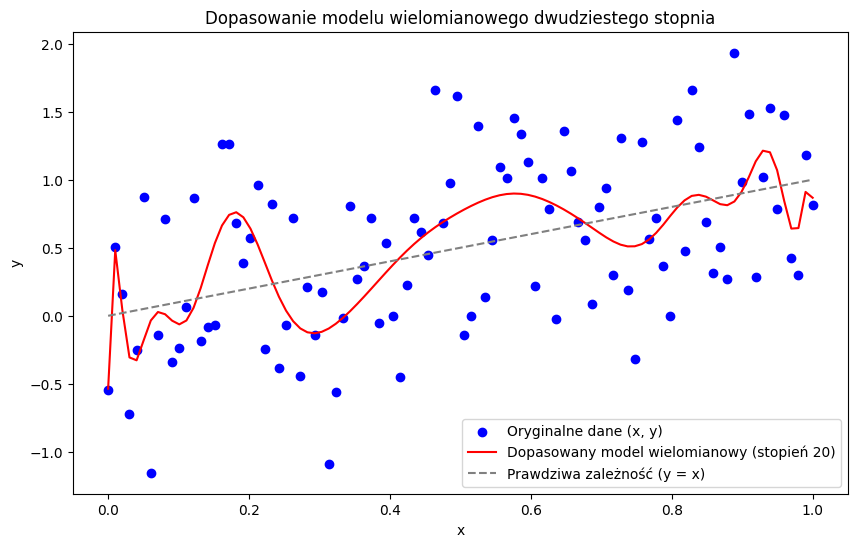

In [35]:
### Przygotowanie danych (przykład używa wcześniej zdefiniowanych zmiennych x i y)
data = pd.DataFrame({
    'x': x.ravel(),  # upewniamy się, że x jest wektorem jednowymiarowym
    'y': y.ravel()
})

### Tworzymy funkcje wielomianowe do stopnia 5 bez uwzględniania biasu
polynomial_features = PolynomialFeatures(degree=20, include_bias=False)
x_poly = polynomial_features.fit_transform(data[['x']]) 

### Dopasowanie modelu wielomianowego
model = LinearRegression().fit(x_poly, data['y'])
y_pred = model.predict(x_poly)

### Sortowanie danych do wizualizacji
sorted_indices = np.argsort(data['x'])
x_sorted = data['x'][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

### Wizualizacja danych i dopasowanego modelu
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Oryginalne dane (x, y)')
plt.plot(x_sorted, y_pred_sorted, color='red', label='Dopasowany model wielomianowy (stopień 20)')
plt.plot(x, x, color='gray', linestyle='--', label='Prawdziwa zależność (y = x)')
plt.title('Dopasowanie modelu wielomianowego dwudziestego stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


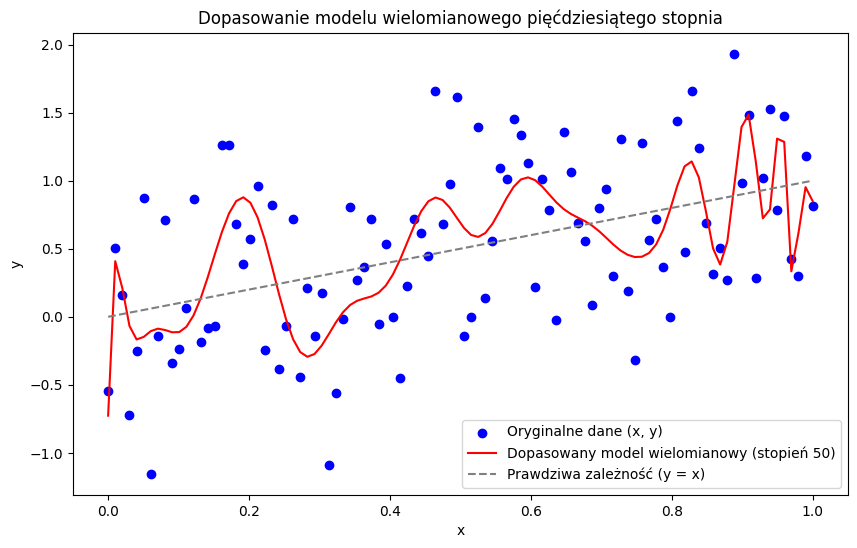

In [36]:
### Przygotowanie danych (przykład używa wcześniej zdefiniowanych zmiennych x i y)
data = pd.DataFrame({
    'x': x.ravel(),  
    'y': y.ravel()
})

### Tworzymy funkcje wielomianowe do stopnia 5 bez uwzględniania biasu
polynomial_features = PolynomialFeatures(degree=50, include_bias=False)
x_poly = polynomial_features.fit_transform(data[['x']])  # wykorzystujemy tylko kolumnę x

### Dopasowanie modelu wielomianowego
model = LinearRegression().fit(x_poly, data['y'])
y_pred = model.predict(x_poly)

### Sortowanie danych do wizualizacji
sorted_indices = np.argsort(data['x'])
x_sorted = data['x'][sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

### Wizualizacja danych i dopasowanego modelu
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', label='Oryginalne dane (x, y)')
plt.plot(x_sorted, y_pred_sorted, color='red', label='Dopasowany model wielomianowy (stopień 50)')
plt.plot(x, x, color='gray', linestyle='--', label='Prawdziwa zależność (y = x)')
plt.title('Dopasowanie modelu wielomianowego pięćdziesiątego stopnia')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [37]:
### Ustawiamy ziarno losowości dla powtarzalności wyników
np.random.seed(0)

### Generowanie 100 obserwacji dla zmiennej zależnej y oraz dla 100 zmiennych niezależnych x1, x2, ..., x100
y = np.random.normal(0, 1, 100)
X = np.random.normal(0, 1, (100, 30))  

### Tworzenie DataFrame z danymi
columns = ['x' + str(i) for i in range(1, 31)]  
data = pd.DataFrame(X, columns=columns)
data['y'] = y  

### Wyświetlenie pierwszych kilku wierszy DataFrame
print(data.head())


         x1        x2        x3        x4        x5        x6        x7  \
0  1.883151 -1.347759 -1.270485  0.969397 -1.173123  1.943621 -0.413619   
1 -0.769916  0.539249 -0.674333  0.031831 -0.635846  0.676433  0.576591   
2 -0.498032  1.929532  0.949421  0.087551 -1.225436  0.844363 -1.000215   
3 -1.292857  0.267051 -0.039283 -1.168093  0.523277 -0.171546  0.771791   
4 -0.955945 -0.345982 -0.463596  0.481481 -1.540797  0.063262  0.156507   

         x8        x9       x10  ...       x22       x23       x24       x25  \
0 -0.747455  1.922942  1.480515  ... -1.099401  0.298238  1.326386 -0.694568   
1 -0.208299  0.396007 -1.093062  ...  1.713343 -0.744755 -0.826439 -0.098453   
2 -1.544771  1.188030  0.316943  ... -1.374951 -0.643618 -2.223403  0.625231   
3  0.823504  2.163236  1.336528  ...  0.317218  0.786328 -0.466419 -0.944446   
4  0.232181 -0.597316 -0.237922  ... -0.397272 -0.132881 -0.297791 -0.309013   

        x26       x27       x28       x29       x30         y  
0 -0

***
### 3.3. Generowanie danych z rozkładu normalnego
<a id="33"></a>

In [38]:
### Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data['y'], test_size=0.2, random_state=42)

### Wyświetlenie rozmiaru zbiorów
print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)


Rozmiar zbioru treningowego: (80, 30)
Rozmiar zbioru testowego: (20, 30)


***
### 3.4. Dopasowanie modelu liniowego przy użyciu "statsmodels"
<a id="34"></a>

In [39]:
### Dodajemy kolumnę jednostkową dla interceptu
X_train_sm = sm.add_constant(X_train)

### Tworzenie i dopasowanie modelu liniowego przy użyciu OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm).fit()

### Wyświetlenie podsumowania modelu
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                 -0.141
Method:                 Least Squares   F-statistic:                    0.6748
Date:                Thu, 30 May 2024   Prob (F-statistic):              0.874
Time:                        04:14:43   Log-Likelihood:                -99.572
No. Observations:                  80   AIC:                             261.1
Df Residuals:                      49   BIC:                             335.0
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0136      0.175      0.077      0.9

***
### 3.5. Analiza istotności zmiennych modelu
<a id="35"></a>

In [40]:
### Znalezienie zmiennej z najniższym p-wartością
p_values = model.pvalues
min_p_value_var = p_values.idxmin()
min_p_value = p_values.min()

### Wyświetlenie zmiennej z najniższym p-wartością oraz wartości tego p-wartości
print(f"Zmienna z najniższym p-wartością: {min_p_value_var}")
print(f"Najniższe p-wartość: {min_p_value}")


Zmienna z najniższym p-wartością: x2
Najniższe p-wartość: 0.009199366303515298


***
### 3.6. Ocena modelu na zbiorach treningowym i testowym
<a id="36"></a>

In [41]:
### Dodanie kolumny jednostkowej do zbioru testowego
X_test_sm = sm.add_constant(X_test)

### Przewidywanie y dla zbiorów treningowego i testowego
y_train_pred = model.predict(X_train_sm)
y_test_pred = model.predict(X_test_sm)

### Obliczanie R^2 dla zbiorów treningowego i testowego
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

### Obliczanie RMSE dla zbiorów treningowego i testowego
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

### Wyświetlanie wyników
print(f"R^2 dla zbioru treningowego: {r2_train}")
print(f"R^2 dla zbioru testowego: {r2_test}")
print(f"RMSE dla zbioru treningowego: {rmse_train}")
print(f"RMSE dla zbioru testowego: {rmse_test}")


R^2 dla zbioru treningowego: 0.29235688539175586
R^2 dla zbioru testowego: -1.293941309258885
RMSE dla zbioru treningowego: 0.8400524981549543
RMSE dla zbioru testowego: 1.5364738537752514


***
## 4. Projekt zaliczeniowy UPEL
Celem projektu jest przeprowadzenie Ekploracyjnej Analizy Danych oraz budowa, dobór i ocena prostego modelu prognostycznego dla zbioru danych w pliku "winequalityN.csv".\
\
Analiza i modelowanie prowadzone będą tylko dla wina wytrawnego ("white").
<a id="4"></a>

***
### 4.1. Import danych
<a id="41"></a>

In [42]:
string_aktualny_plik_z_danymi = "winequalityN.csv"
dataframe_wine_quality = pd.read_csv(string_aktualna_sciezka_katalogu_danych+string_aktualny_plik_z_danymi)
dataframe_wine_quality.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


***
### 4.2. Sprawdzanie typów danych w ramce
<a id="42"></a>

In [43]:
print(dataframe_wine_quality.dtypes)

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


***
### 4.3. Zmiana nazw kolumn
<a id="43"></a>

In [44]:
### Zmiana nazw kolumn
dataframe_wine_quality = dataframe_wine_quality.rename(columns=
                                                       {'type' : 'typ-wina', 
                                                        'fixed acidity' : 'stala-kwasowosc', 
                                                        'volatile acidity': 'ulotna-kwasowosc',
                                                        'citric acid' : 'kwas-cytrynowy',
                                                        'residual sugar' : 'cukier',
                                                        'chlorides' : 'chlorki',
                                                        'free sulfur dioxide' : 'czastkowy-dwutlenek-siarki',
                                                        'total sulfur dioxide' : 'calkowity-dwutlenek-siarki',
                                                        'density' : 'gestosc',
                                                        'pH' : 'pH',
                                                        'sulphates' : 'siarczany',
                                                        'alcohol' : 'alkohol',
                                                        'quality' : 'jakosc'
                                                         })

### Wyświetlenie ramki danych po zmianie nazw kolumn
print(dataframe_wine_quality.head())

  typ-wina  stala-kwasowosc  ulotna-kwasowosc  kwas-cytrynowy  cukier  \
0    white              7.0              0.27            0.36    20.7   
1    white              6.3              0.30            0.34     1.6   
2    white              8.1              0.28            0.40     6.9   
3    white              7.2              0.23            0.32     8.5   
4    white              7.2              0.23            0.32     8.5   

   chlorki  czastkowy-dwutlenek-siarki  calkowity-dwutlenek-siarki  gestosc  \
0    0.045                        45.0                       170.0   1.0010   
1    0.049                        14.0                       132.0   0.9940   
2    0.050                        30.0                        97.0   0.9951   
3    0.058                        47.0                       186.0   0.9956   
4    0.058                        47.0                       186.0   0.9956   

     pH  siarczany  alkohol  jakosc  
0  3.00       0.45      8.8       6  
1  3.30   

***
### 4.4. Usuwanie typu wina "red"
Dalsza analiza prowadzona będzie tylko dla typu wina "white".
<a id="44"></a>

In [45]:
### Usuwam typ wina "red" - dalsza analiza prowadzona będzie tylko dla typu wina "white".
dataframe_wine_quality = dataframe_wine_quality.drop(dataframe_wine_quality[dataframe_wine_quality['typ-wina'] == 'red'].index)

### Usuwam kolumnę z nazwą typów - mam już tylko dane dla typu "white".
del dataframe_wine_quality['typ-wina']

***
### 4.5. Usuwanie zduplikowanych wierszy
<a id="45"></a>

In [46]:
### Wyświetlenie liczby wierszy przed usunięciem duplikatów
print("Liczba wierszy przed usunięciem duplikatów:", len(dataframe_wine_quality))

### Usunięcie zduplikowanych wierszy
dataframe_wine_quality = dataframe_wine_quality.drop_duplicates()

### Wyświetlenie liczby wierszy po usunięciu duplikatów
print("Liczba wierszy po usunięciu duplikatów:", len(dataframe_wine_quality))

### Wyświetlenie liczby wartości niepustych w każdej kolumnie
print(dataframe_wine_quality.count())

Liczba wierszy przed usunięciem duplikatów: 4898
Liczba wierszy po usunięciu duplikatów: 3970
stala-kwasowosc               3962
ulotna-kwasowosc              3963
kwas-cytrynowy                3968
cukier                        3968
chlorki                       3968
czastkowy-dwutlenek-siarki    3970
calkowity-dwutlenek-siarki    3970
gestosc                       3970
pH                            3963
siarczany                     3968
alkohol                       3970
jakosc                        3970
dtype: int64


***
### 4.6. Usuwanie brakujących lub pustych wartości
<a id="46"></a>

In [47]:
### Wyświetlenie liczby brakujących wartości dla każdej kolumny
print(dataframe_wine_quality.isnull().sum())

### Usuwanie brakujących wartości
dataframe_wine_quality = dataframe_wine_quality.dropna()    

### Wyświetlanie liczby niepustych wartości
print(dataframe_wine_quality.count())

### Ramka danych po raz kolejny - tym razem po usunięciu pustych wartości
print(dataframe_wine_quality.isnull().sum())  

stala-kwasowosc               8
ulotna-kwasowosc              7
kwas-cytrynowy                2
cukier                        2
chlorki                       2
czastkowy-dwutlenek-siarki    0
calkowity-dwutlenek-siarki    0
gestosc                       0
pH                            7
siarczany                     2
alkohol                       0
jakosc                        0
dtype: int64
stala-kwasowosc               3942
ulotna-kwasowosc              3942
kwas-cytrynowy                3942
cukier                        3942
chlorki                       3942
czastkowy-dwutlenek-siarki    3942
calkowity-dwutlenek-siarki    3942
gestosc                       3942
pH                            3942
siarczany                     3942
alkohol                       3942
jakosc                        3942
dtype: int64
stala-kwasowosc               0
ulotna-kwasowosc              0
kwas-cytrynowy                0
cukier                        0
chlorki                       0
czastkowy-

***
### 4.7. Eksploracja danych - statyski opisowe
<a id="47"></a>

In [48]:
dataframe_wine_quality.describe()

,stala-kwasowosc,ulotna-kwasowosc,kwas-cytrynowy,cukier,chlorki,czastkowy-dwutlenek-siarki,calkowity-dwutlenek-siarki,gestosc,pH,siarczany,alkohol,jakosc
count,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000,3942.000000
mean,6.840297,0.280430,0.334490,5.918721,0.045887,34.918062,137.215753,0.993788,3.195287,0.490236,10.591945,5.855150
std,0.866067,0.103256,0.122404,4.861389,0.023088,17.227540,43.128509,0.002907,0.151345,0.113653,1.217787,0.890944
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991600,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.328750,0.390000,8.875000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


***
### 4.8. Eksploracja danych - wizualizacja rozkładu cech
<a id="48"></a>

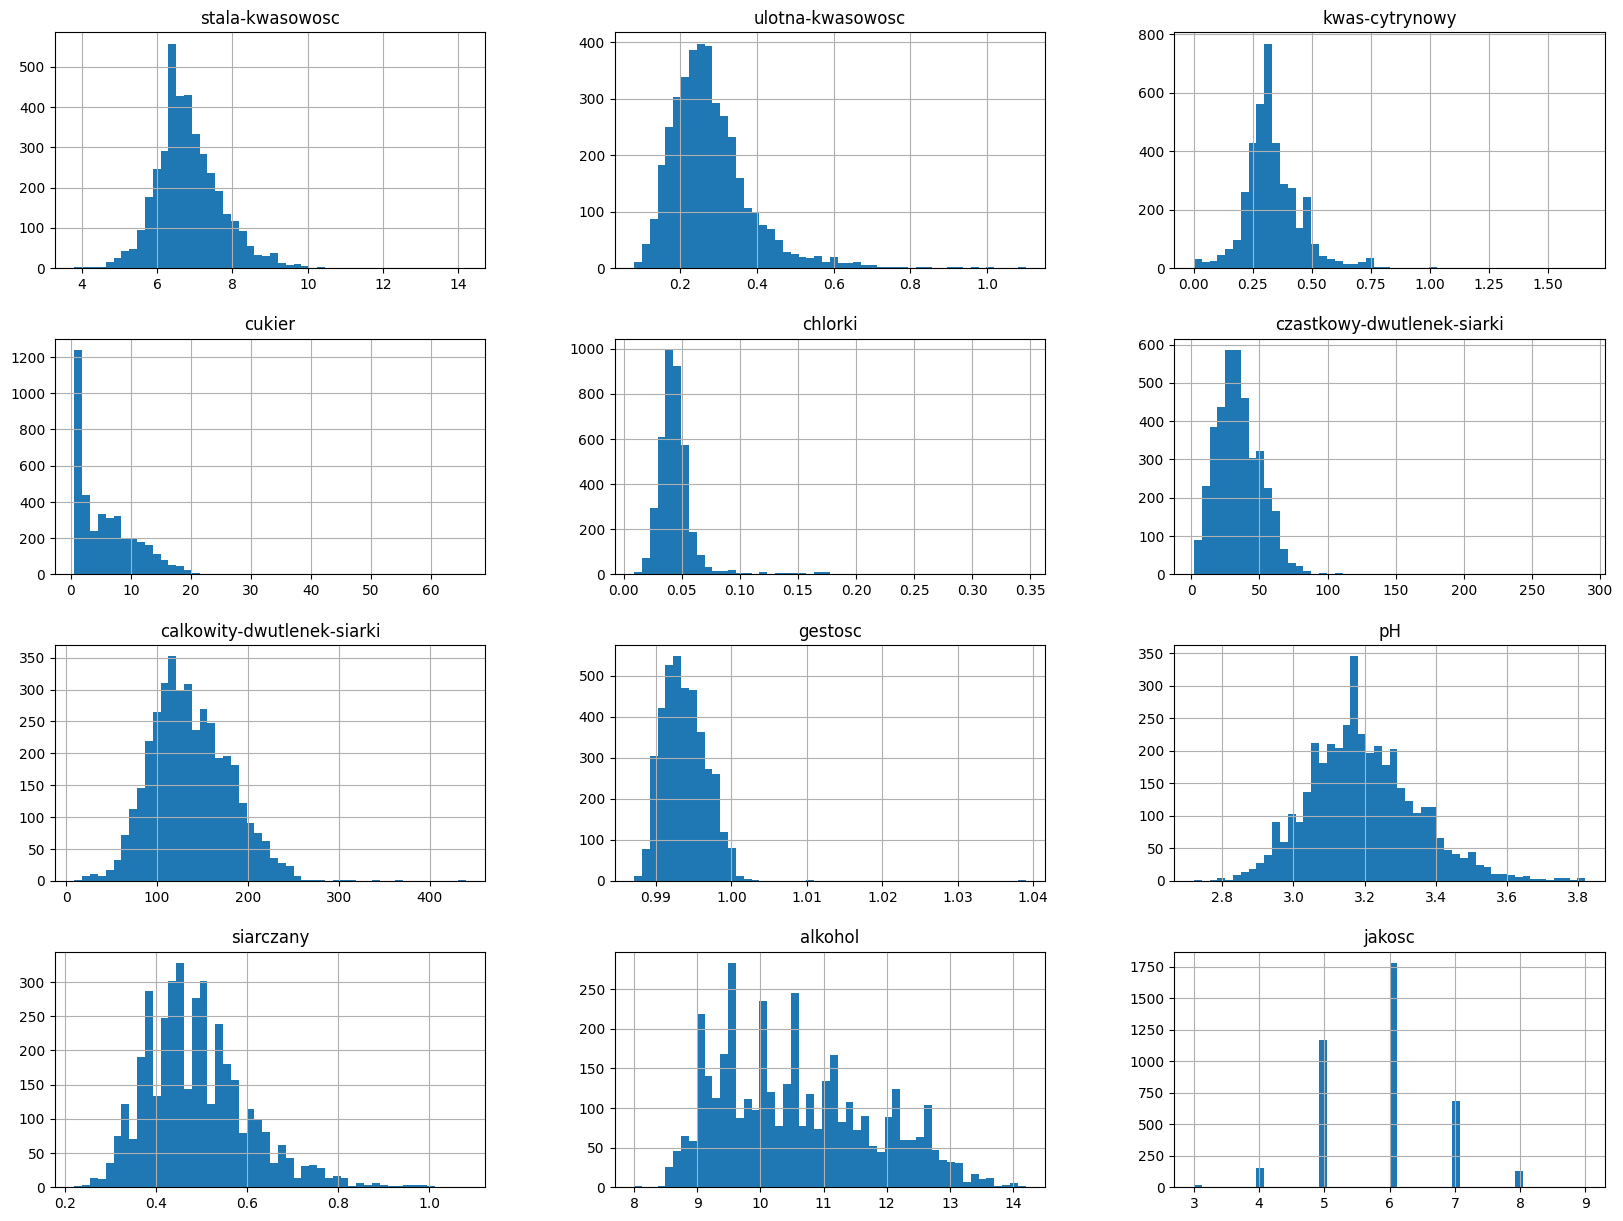

In [49]:
### Histogramy każdej zmiennej
integer_liczba_bins_histogramow = 50
integer_rozmiar_x_wykresow = 20
integer_rozmiar_y_wykresow = 15

dataframe_wine_quality.hist(bins=integer_liczba_bins_histogramow, 
                              figsize=(integer_rozmiar_x_wykresow,integer_rozmiar_y_wykresow))

plt.show()

***
### 4.9. Eksploracja danych - macierz korelacji
<a id="49"></a>

In [50]:
dataframe_wine_quality.corr()

,stala-kwasowosc,ulotna-kwasowosc,kwas-cytrynowy,cukier,chlorki,czastkowy-dwutlenek-siarki,calkowity-dwutlenek-siarki,gestosc,pH,siarczany,alkohol,jakosc
stala-kwasowosc,1.000000,-0.017455,0.297038,0.082106,0.024580,-0.057620,0.083736,0.266284,-0.429983,-0.015333,-0.112364,-0.123149
ulotna-kwasowosc,-0.017455,1.000000,-0.159824,0.097543,0.088007,-0.102331,0.101267,0.059658,-0.049255,-0.021543,0.048119,-0.190466
kwas-cytrynowy,0.297038,-0.159824,1.000000,0.107283,0.130676,0.091643,0.124218,0.161167,-0.180768,0.051370,-0.077535,0.007222
cukier,0.082106,0.097543,0.107283,1.000000,0.076876,0.307277,0.409190,0.820395,-0.164483,-0.020624,-0.399328,-0.114832
chlorki,0.024580,0.088007,0.130676,0.076876,1.000000,0.100716,0.191192,0.253735,-0.088918,0.018982,-0.356504,-0.218665
czastkowy-dwutlenek-siarki,-0.057620,-0.102331,0.091643,0.307277,0.100716,1.000000,0.619955,0.294925,-0.006864,0.037800,-0.252227,0.010592
calkowity-dwutlenek-siarki,0.083736,0.101267,0.124218,0.409190,0.191192,0.619955,1.000000,0.536427,0.008744,0.136512,-0.446747,-0.183495
gestosc,0.266284,0.059658,0.161167,0.820395,0.253735,0.294925,0.536427,1.000000,-0.062498,0.082180,-0.760901,-0.336553
pH,-0.429983,-0.049255,-0.180768,-0.164483,-0.088918,-0.006864,0.008744,-0.062498,1.000000,0.140928,0.093097,0.121920
siarczany,-0.015333,-0.021543,0.051370,-0.020624,0.018982,0.037800,0.136512,0.082180,0.140928,1.000000,-0.023090,0.052661


***
### 4.10. Eksploracja danych - wizualizacja związku pomiędzy zmienną objaśnianą, a objaśniającymi
<a id="410"></a>

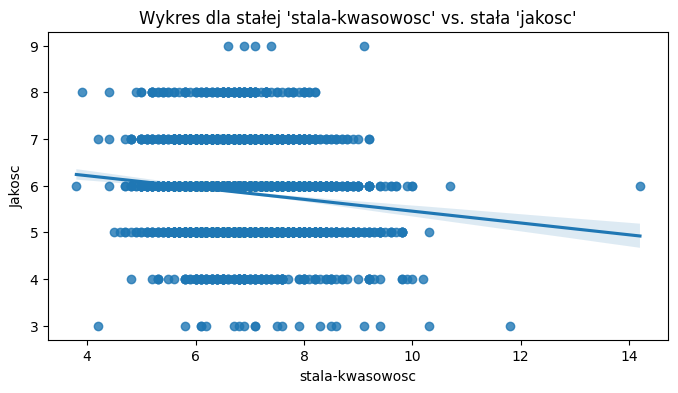

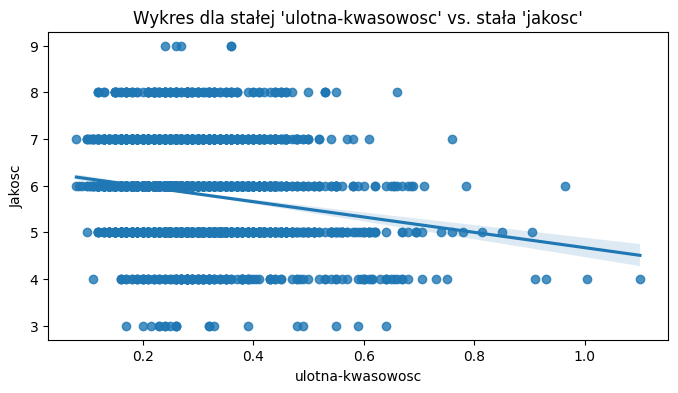

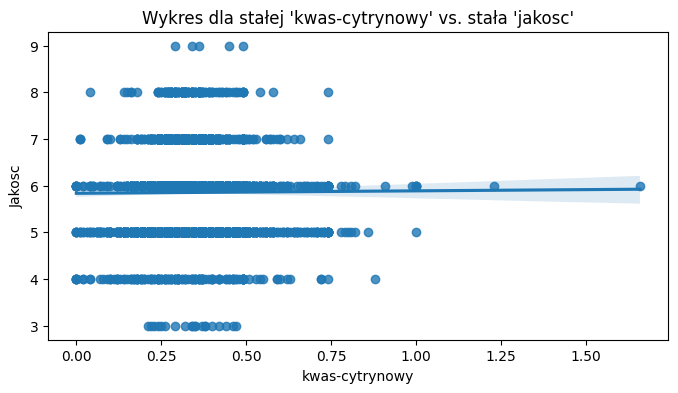

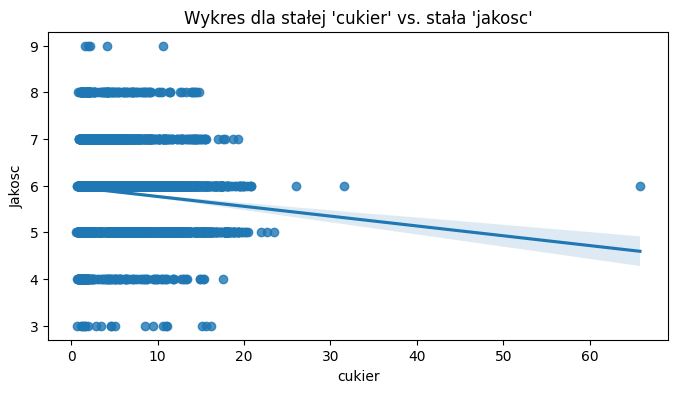

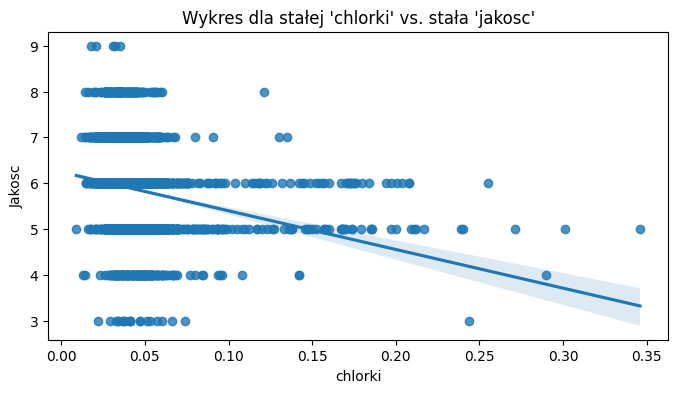

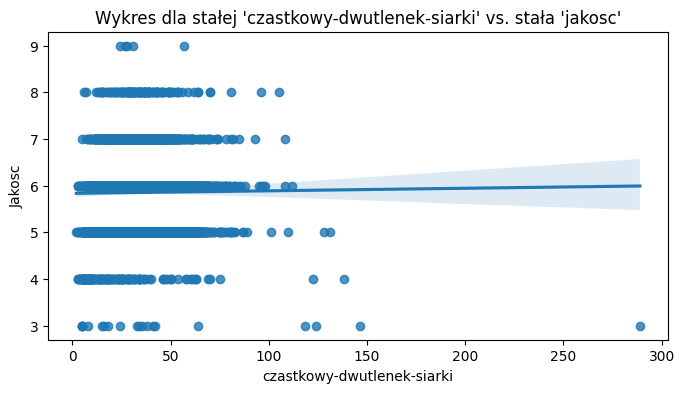

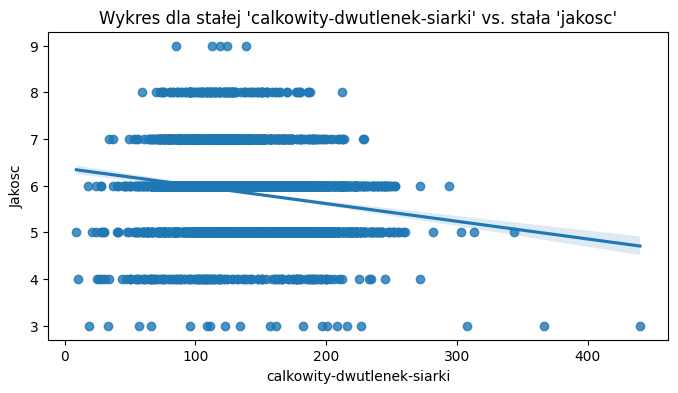

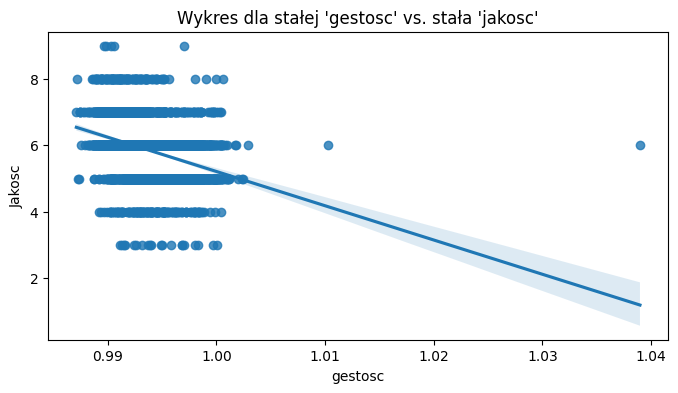

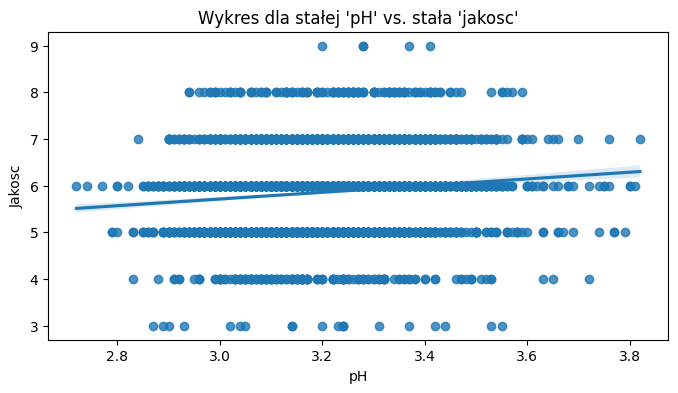

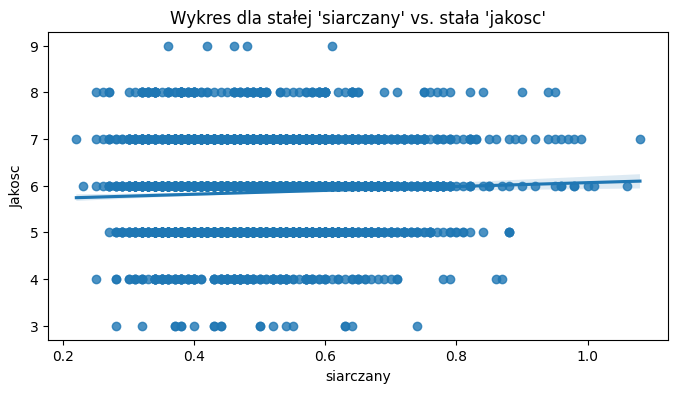

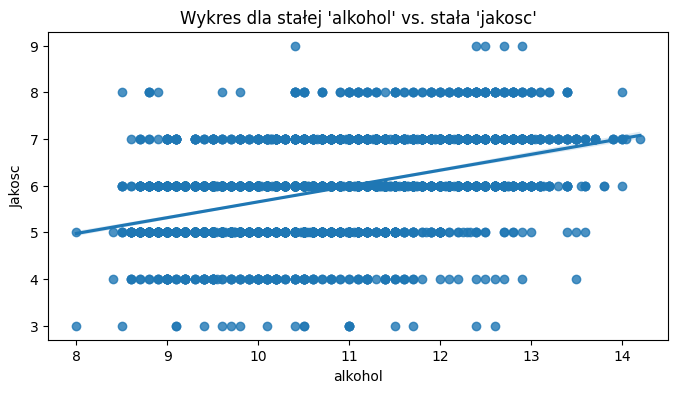

In [51]:
### Definicja zmiennych liczbowych
lista_nazwy_zmiennych_liczbowych = ['stala-kwasowosc', 
                                    'ulotna-kwasowosc',
                                    'kwas-cytrynowy',
                                    'cukier',
                                    'chlorki',
                                    'czastkowy-dwutlenek-siarki',
                                    'calkowity-dwutlenek-siarki',
                                    'gestosc',
                                    'pH',
                                    'siarczany',
                                    'alkohol']

### Tworzenie wykresów
integer_rozmiar_x_wykresow = 8
integer_rozmiar_y_wykresow = 4

for counter_aktualna_nazwa in lista_nazwy_zmiennych_liczbowych: 
    plt.figure(figsize=(integer_rozmiar_x_wykresow,integer_rozmiar_y_wykresow))
    sns.regplot(data=dataframe_wine_quality, x=counter_aktualna_nazwa, y='jakosc')
    plt.title(f'Wykres dla stałej \'{counter_aktualna_nazwa}\' vs. stała \'jakosc\'')
    plt.xlabel(counter_aktualna_nazwa)
    plt.ylabel('Jakosc')
    plt.show()
    

***
### 4.11. Selekcja zmiennych objaśniających do modelu liniowego oraz podział danych na zbiory uczące i testowe
Do modelu liniowego wybieram tylko dwie zmienne objaśniające: "chlorki" oraz "alkohol".
<a id="411"></a>

In [52]:
### Do dalszej analizy wybieram tylko dwie zmienne objaśniające "chlorki" oraz "alkohol"
dataframe_wine_quality_do_modelu_liniowego = dataframe_wine_quality
#lista_wybranych_zmiennych_do_modelu = ['jakosc','chlorki', 'alkohol']
#dataframe_wine_quality_do_modelu_liniowego = dataframe_wine_quality_do_modelu_liniowego[lista_wybranych_zmiennych_do_modelu]

### Przyporządkowanie danych
X = []
y = []
X = dataframe_wine_quality_do_modelu_liniowego.drop('jakosc', axis=1)
y = dataframe_wine_quality_do_modelu_liniowego['jakosc']

#### Podział danych na zbiór uczący i testowy
X_train = []
X_test = []
y_train = []
y_test = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("Liczba wierszy w zbiorze treningowym:", len(X_train))
print("Liczba wierszy w zbiorze testowym:", len(X_test))
print("Nazwy koumn ramki danych do modelowania:", list(dataframe_wine_quality_do_modelu_liniowego.columns))

Liczba wierszy w zbiorze treningowym: 3153
Liczba wierszy w zbiorze testowym: 789
Nazwy koumn ramki danych do modelowania: ['stala-kwasowosc', 'ulotna-kwasowosc', 'kwas-cytrynowy', 'cukier', 'chlorki', 'czastkowy-dwutlenek-siarki', 'calkowity-dwutlenek-siarki', 'gestosc', 'pH', 'siarczany', 'alkohol', 'jakosc']


***
### 4.12. Budowa modelu regresji liniowej
<a id="412"></a>

In [53]:
### Tworzenie modelu regresji liniowej
obiekt_modelu_regresji_liniowej_dla_wine_quality = LinearRegression()

### Trenowanie modelu regresji liniowej
obiekt_modelu_regresji_liniowej_dla_wine_quality.fit(X_train, y_train)

for name, coef in zip(dataframe_wine_quality_do_modelu_liniowego.columns[:-1], obiekt_modelu_regresji_liniowej_dla_wine_quality.coef_):
    print(f'{name}: {coef:.4f}')

stala-kwasowosc: 0.0509
ulotna-kwasowosc: -1.5137
kwas-cytrynowy: 0.2841
cukier: 0.0705
chlorki: -0.4848
czastkowy-dwutlenek-siarki: 0.0063
calkowity-dwutlenek-siarki: -0.0008
gestosc: -138.3260
pH: 0.8487
siarczany: 0.6753
alkohol: 0.2131


***
### 4.13. Obliczanie przedziałów ufności współczynników
<a id="413"></a>

In [54]:
### Dodaję stałą
X_train_with_const = sm.add_constant(X_train)

### Trenuję model
ols_model_wine_quality_wszystkie_zmienne = sm.OLS(y_train, X_train_with_const).fit()

### Podsumowanie
ols_model_wine_quality_wszystkie_zmienne.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 jakosc   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     123.2
Date:                Thu, 30 May 2024   Prob (F-statistic):          4.19e-235
Time:                        04:14:53   Log-Likelihood:                -3569.6
No. Observations:                3153   AIC:                             7163.
Df Residuals:                    3141   BIC:                             7236.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        137.5029     21.434      6.415      0.000      95.477     179.529
stala-kwasowosc                0.0509      0.024      2.077      0.038       0.003       0.099
ulotna-kwasowosc              -1.5137      0.144    -10.476      0.000      -1.797      -1.230
kwas-cytrynowy                 0.2841      0.117      2.427      0.015       0.055       0.514
cukier                         0.0705      0.009      7.953      0.000       0.053       0.088
chlorki                       -0.4848      0.619     -0.783      0.433      -1.698       0.729
czastkowy-dwutlenek-siarki     0.0063      0.001      5.928      0.000       0.004       0.008
calkowity-dwutlenek-siarki    -0.0008      0.000     -1.742      0.082      -0.002       0.000
gestosc                     -138.3260     21.746     -6.361      0.000    -180.963     -95.689
pH                             0.8487      0.127      6.672      0.000       0.599       1.098
siarczany                      0.6753      0.126      5.355      0.000       0.428       0.923
alkohol                        0.2131      0.028      7.588      0.000       0.158       0.268
==============================================================================
Omnibus:                       79.016   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.321
Skew:                          -0.048   Prob(JB):                     2.57e-40
Kurtosis:                       4.174   Cond. No.                     3.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
### 4.14. Selekcja zmiennych metodą Krokowej Eliminacji Wstecznej (KEW) 
<a id="414"></a>

In [55]:
### Ustalenie poziomu istotności
float_alpha = 0.05

selected_features = X_train_with_const.columns.tolist()
ols_model_wine_quality_metoda_kew = sm.OLS(y_train, X_train_with_const).fit()

while max(ols_model_wine_quality_metoda_kew.pvalues) > float_alpha: 
    col_to_remove = ols_model_wine_quality_metoda_kew.pvalues.idxmax()
    selected_features.remove(col_to_remove)
    ols_model_wine_quality_metoda_kew = sm.OLS(y_train, X_train_with_const[selected_features]).fit()
    
print("Wybrane zmienne:")
print(selected_features)

print("\nParametry modelu:")
display(ols_model_wine_quality_metoda_kew.summary())

Wybrane zmienne:
['const', 'stala-kwasowosc', 'ulotna-kwasowosc', 'kwas-cytrynowy', 'cukier', 'czastkowy-dwutlenek-siarki', 'gestosc', 'pH', 'siarczany', 'alkohol']

Parametry modelu:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 jakosc   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     150.1
Date:                Thu, 30 May 2024   Prob (F-statistic):          1.70e-236
Time:                        04:14:53   Log-Likelihood:                -3571.4
No. Observations:                3153   AIC:                             7163.
Df Residuals:                    3143   BIC:                             7223.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        145.7748     20.931      6.965      0.000     104.735     186.815
stala-kwasowosc                0.0540      0.024      2.236      0.025       0.007       0.101
ulotna-kwasowosc              -1.5830      0.140    -11.318      0.000      -1.857      -1.309
kwas-cytrynowy                 0.2605      0.116      2.249      0.025       0.033       0.488
cukier                         0.0731      0.009      8.437      0.000       0.056       0.090
czastkowy-dwutlenek-siarki     0.0052      0.001      6.043      0.000       0.004       0.007
gestosc                     -146.7853     21.220     -6.917      0.000    -188.392    -105.178
pH                             0.8575      0.126      6.826      0.000       0.611       1.104
siarczany                      0.6534      0.125      5.219      0.000       0.408       0.899
alkohol                        0.2144      0.028      7.635      0.000       0.159       0.269
==============================================================================
Omnibus:                       79.087   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.969
Skew:                          -0.035   Prob(JB):                     1.13e-40
Kurtosis:                       4.181   Cond. No.                     9.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***
### 4.15. Porównanie jakości modeli względem zbioru testowego
<a id="415"></a>

In [56]:
### Jakość modelu ze wszystkimi zmiennymi
X_test_with_const = sm.add_constant(X_test)
y_pred_wszystkie_zmienne = ols_model_wine_quality_wszystkie_zmienne.predict(X_test_with_const)
mse_wszystkie_zmienne = mean_squared_error(y_test, y_pred_wszystkie_zmienne)
r2_wszystkie_zmienne = r2_score(y_test, y_pred_wszystkie_zmienne)

### Jakość modelu po selekcji zmiennych metodą Krokowej Eliminacji Wstecznej (KEW)
X_test_selected = X_test_with_const[ols_model_wine_quality_metoda_kew.model.exog_names]
y_pred = ols_model_wine_quality_metoda_kew.predict(X_test_selected)
mse_metoda_kew = mean_squared_error(y_test, y_pred)
r2_metoda_kew = r2_score(y_test, y_pred)

print("Porównanie wyników na zbiorze testowym:")
print(f'Model z wszystkimi zmiennymi: MSE = {mse_wszystkie_zmienne:.4f}, R^2 = {r2_wszystkie_zmienne:.4f}')
print(f'Model po selekcji: MSE = {mse_metoda_kew:.4f}, R^2 = {r2_metoda_kew:.4f}')


Porównanie wyników na zbiorze testowym:
Model z wszystkimi zmiennymi: MSE = 0.5242, R^2 = 0.2930
Model po selekcji: MSE = 0.5235, R^2 = 0.2938


***
### 4.16. Podsumowanie i dyskusja wyników
<a id="416"></a>
W niniejszej sekcji ([4.](#4)) przeprowadzona została analiza EDA zbioru danych jakości win (plik wejściowy: "winequalityN.csv").

Po wstępnej analizie, z zaimportowanego zbioru danych usunięto typ win czerwonych i pozostawiono jedynie wina wytrawne ("white"). Wina czerwone stanowiły około 20% całego zbioru danych - w mojej ocenie, praca na dwóch typach win utrudniłaby modelowanie jakości wina. Z tego właśnie powodu zdecydowałem się pozostawić jedynie wina wytrawne.

Zmienna jakość win ma formę skali numerycznej. Wizualizacja danych przedstawiona w sekcji [4.10.](#410) wykazała, że modelowanie zależności jakości win od pozostałych zmiennych objaśniających będzie trudne - a właściwe wręcz niemożliwe - przy użyciu modelu liniowego. Z tego właśnie powodu, bardziej właściwym rozwiązaniem, niż model liniowy, byłoby zastosowanie innego algorytmu modelowania. 

W tym miejscu zaznaczam, że wybór zmiennej objaśnianej "jakosc" win został z góry zdefiniowany jako wymaganie nieniejszego projektu.

Na podstawie EDA w sekcjach od [4.7.](#47) do [4.10.](#410) stwierdzam, że dużą moc dyskryminacyjną zmiennej objaśnianej "jakosc" mają dwie zmienne objaśniające "chlorki" oraz "alkohol". Z tego właśnie powodu, planowałem w sekcji [4.11.](#411) pozostawić tylko dwie zmienne objaśniające (patrz wykomentowane linie kodu, które miały służyć pozostawieniu tylko dwóch wspomnianych zmiennych objaśniających). Analiza dokładności prognostycznej modelu liniowego (wykorzystując R-Kwadrat jako parametr oceny) nie wykazała jednak wyższej dokładności, jeśli zastosowane zostałyby tylko dwie ww. zmienne objaśniające. Z tego powodu, zdecydowałem się zbudować model oraz przeprowadzić dalszą analizę (w tym budowę drugiego modelu z wykorzystaniem selekcji zmiennych metodą Krokowej Eliminacji Wstecznej; skrót: KWE) przy użyciu wszystkich zmiennych objaśniających.

Zbiory uczące i testowe zostały zbudowane w proporcjach 80% do 20% głównego zbioru danych.

Dokładności prognostyczne obydwu modeli liniowych - jednego zbudowanego na wszystkich zmiennych oraz drugiego tylko dla zmiennych wyselekcjonowanych metodą KWE - są niskie i nie przekraczają R-Kwadrat > 0.294. Stwierdzam, że prognozowanie jakości win dla danego zbioru danych przy użyciu modelu liniowego jest niewłaściwe. Należałoby zastosować tutaj model prognostyczny bazujący na innym algorytmie.